# House Price Prediction using Python  

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Toronto\Data Mining\Project Data\Housing\housing.csv")

# 1. Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the useful libraries.
 
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. Getting fimiliar with data

In [6]:
#Getting data type of varibles
#Method 1
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
#Method 2
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# 3. Missing values

In [21]:
 #method #2
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
#check null value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] 
  total_miss = df.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [9]:
percentage_of_miss()

,Number of Missing,Percentage
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


# 4. Duplicate Data

In [30]:
df_nodub=df.drop_duplicates()

print(df.shape,df_nodub.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodub.shape[0])

(20640, 10) (20640, 10) 
 Number of duplicate data :  0


In [32]:
type(df.columns)

pandas.core.indexes.base.Index

# 5. Numerical variables of the data set

In [34]:
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# 6. Catagorical variables of the data set

In [35]:
df_cat=df.select_dtypes(include='object')# Just get me the categorical variables
df_cat.columns

Index(['ocean_proximity'], dtype='object')

# 7. The statistical summary of the dataset

In [10]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [27]:
#data description
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82,NaN
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62,NaN
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,NaN
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00,NaN
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00,NaN
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00,NaN


In [28]:
#finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)
#Method 1
df.astype('object').describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00,20640
unique,844.00,862.00,52.00,5926.00,1923.00,3888.00,1815.00,12928.00,3842.00,5
top,-118.31,34.06,52.00,1527.00,280.00,891.00,306.00,3.12,500001.00,<1H OCEAN
freq,162.00,244.00,1273.00,18.00,55.00,25.00,57.00,49.00,965.00,9136


# 8. Finding unique values

In [39]:
df.astype('object').describe().transpose()#transpose to swap rows and columns
#or
#df.astype('object').describe().T

,count,unique,top,freq
longitude,20640.00,844.00,-118.31,162.00
latitude,20640.00,862.00,34.06,244.00
housing_median_age,20640.00,52.00,52.00,1273.00
total_rooms,20640.00,5926.00,1527.00,18.00
total_bedrooms,20433.00,1923.00,280.00,55.00
population,20640.00,3888.00,891.00,25.00
households,20640.00,1815.00,306.00,57.00
median_income,20640.00,12928.00,3.12,49.00
median_house_value,20640.00,3842.00,500001.00,965.00
ocean_proximity,20640,5,<1H OCEAN,9136


In [57]:
df["housing_median_age"].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [58]:
df["total_rooms"].unique()

array([  880.,  7099.,  1467., ...,  4598.,   272., 10035.])

In [59]:
df["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [60]:
#method#2
for i in df.columns:
    print(i)
    print(len(df[i].unique()))
    print("--------------------------")

longitude
844
--------------------------
latitude
862
--------------------------
housing_median_age
52
--------------------------
total_rooms
5926
--------------------------
total_bedrooms
1924
--------------------------
population
3888
--------------------------
households
1815
--------------------------
median_income
12928
--------------------------
median_house_value
3842
--------------------------
ocean_proximity
5
--------------------------


In [61]:
#Method 3
#finding just unique values
df.apply(lambda x: len(x.unique()))

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1924
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

## 9. Find the Frequency of each items(levels)

In [62]:
#categrocial variables
df_cat=df.select_dtypes(include='object')
#or
#categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}

In [63]:
for i in df_cat.columns:
    print(i,":")
    print(df[i].value_counts())
    print("--------------------------")

ocean_proximity :
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
--------------------------


In [64]:
#Find the Frequency of each items(levels)
#method2

df_cat.apply(lambda x:print( x.value_counts()))

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


ocean_proximity    None
dtype: object

In [65]:
#Method 3
# Filter categorical variables
for col in df_cat.columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [66]:
#Method 3
for col in df_cat.columns:
    print (f'\nFrequency of Categories for {col} column')
    print(df[col].value_counts())


Frequency of Categories for ocean_proximity column
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


## 11. Linear relatioship among data set variables

In [40]:
df.corr()  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00


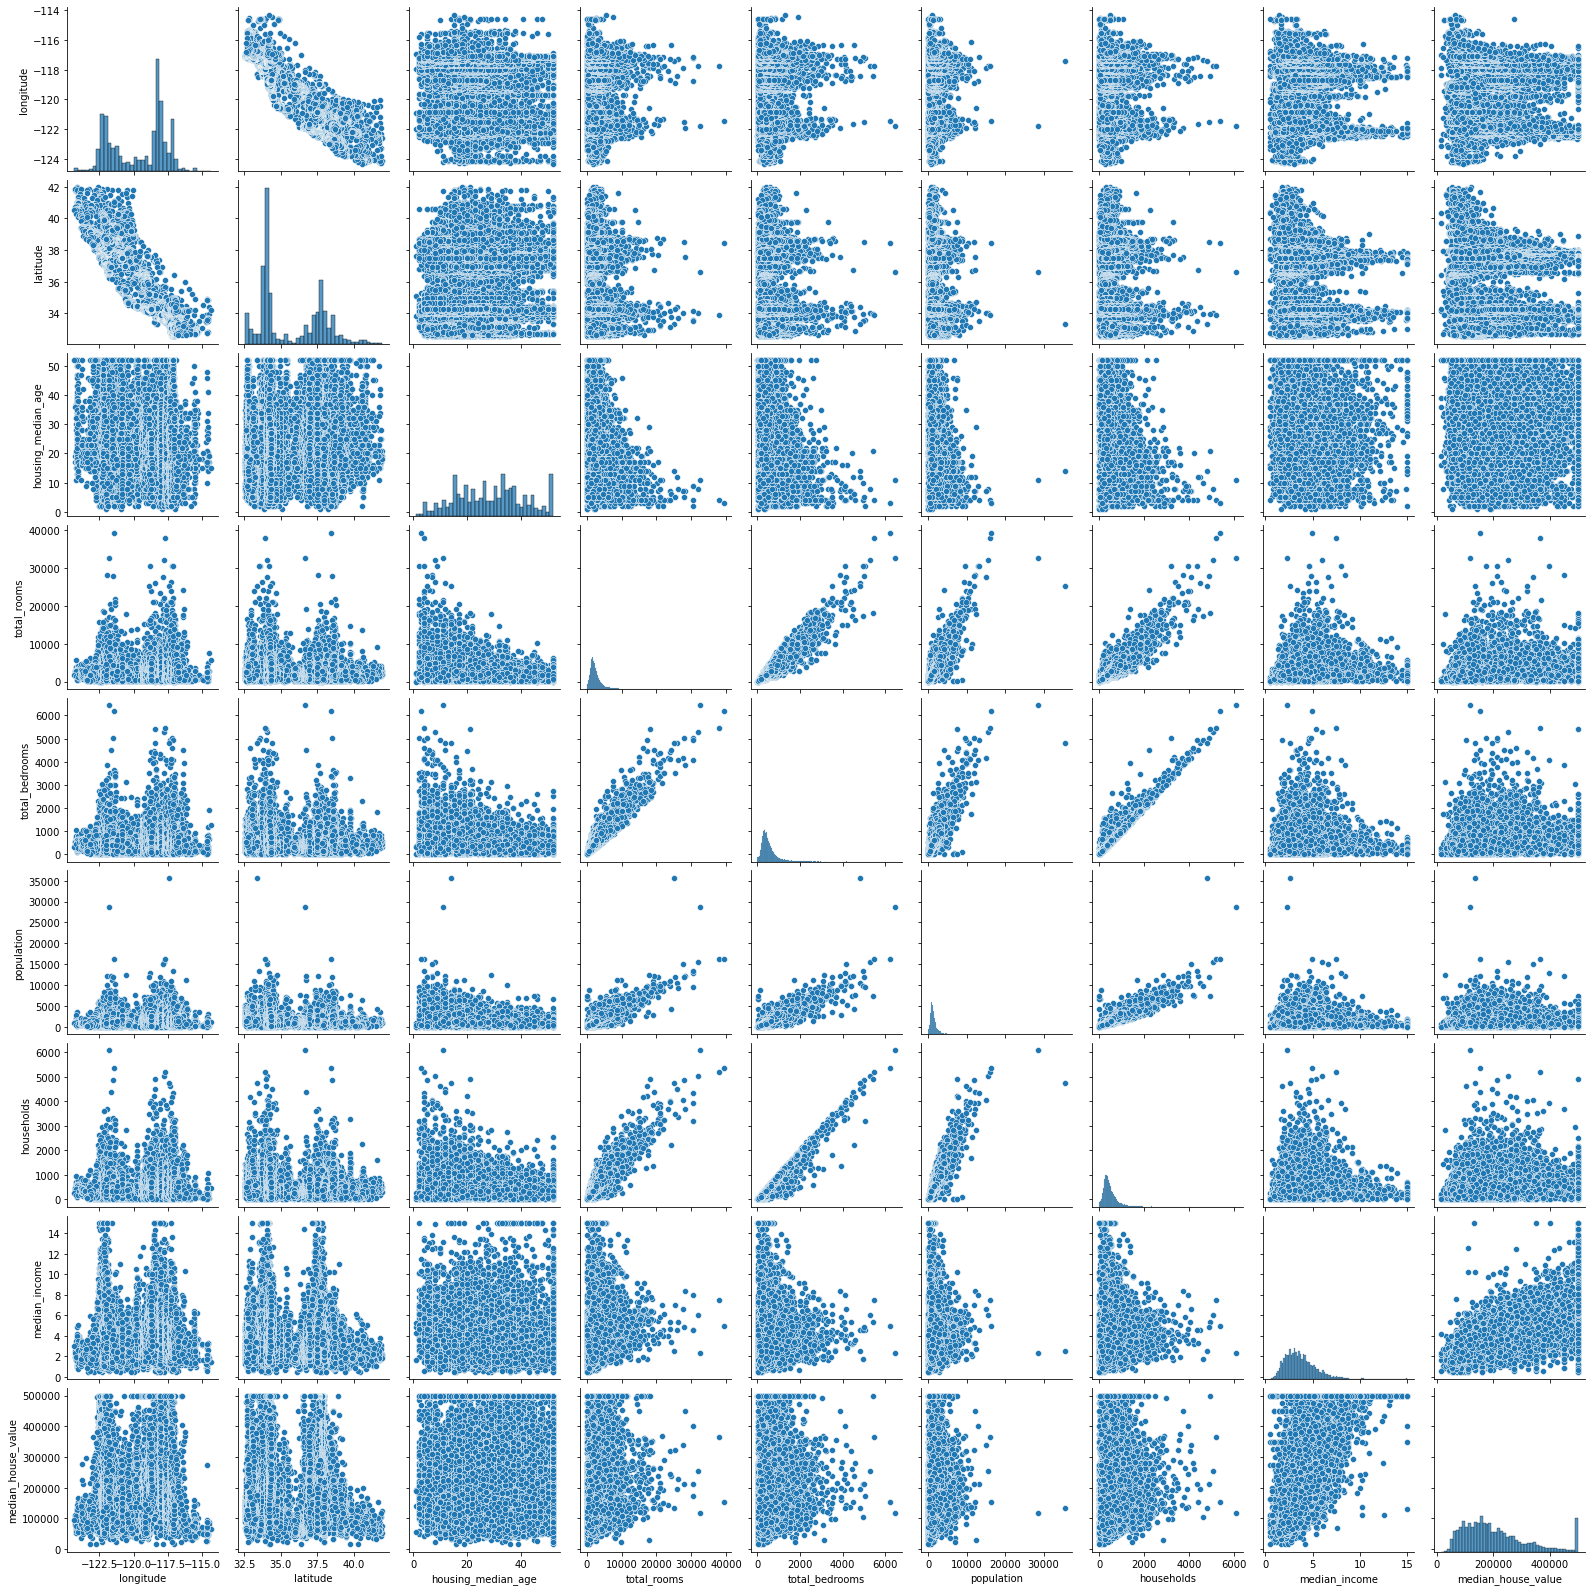

In [68]:
sns.pairplot(df)

<AxesSubplot:>

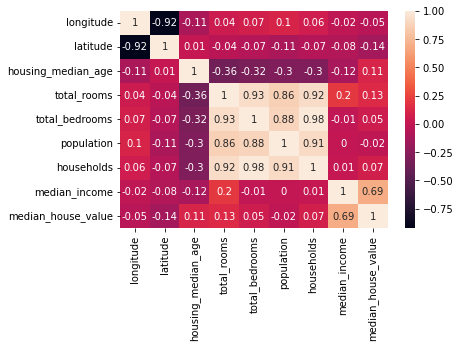

In [69]:
sns.heatmap(np.round(df.corr(),2), annot=True)

## 12. Getting into Each Column

In [71]:
Housing_Age=df['housing_median_age'].value_counts()
Housing_Age

52.00    1273
36.00     862
35.00     824
16.00     771
17.00     698
34.00     689
26.00     619
33.00     615
18.00     570
25.00     566
32.00     565
37.00     537
15.00     512
19.00     502
27.00     488
24.00     478
30.00     476
28.00     471
20.00     465
29.00     461
31.00     458
23.00     448
21.00     446
14.00     412
22.00     399
38.00     394
39.00     369
42.00     368
44.00     356
43.00     353
40.00     304
13.00     302
41.00     296
45.00     294
10.00     264
11.00     254
46.00     245
5.00      244
12.00     238
8.00      206
9.00      205
47.00     198
4.00      191
48.00     177
7.00      175
6.00      160
50.00     136
49.00     134
3.00       62
2.00       58
51.00      48
1.00        4
Name: housing_median_age, dtype: int64

In [72]:
df['housing_median_age'].describe()

count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64

Text(0.5, 1, 'Housing_Median_Age Counts')

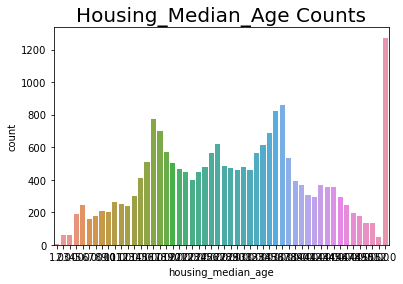

In [73]:
#countplot
sns.countplot(df['housing_median_age'])
plt.title("Housing_Median_Age Counts", y=1, fontdict={"fontsize": 20})

In [74]:
T_Rooms=df['total_rooms'].value_counts()
T_Rooms

1527.00     18
1613.00     17
1582.00     17
2127.00     16
1717.00     15
            ..
9614.00      1
10839.00     1
11872.00     1
6205.00      1
10035.00     1
Name: total_rooms, Length: 5926, dtype: int64

In [75]:
df['total_rooms'].describe()

count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64

Text(0.5, 1, 'Total_Mooms Counts')

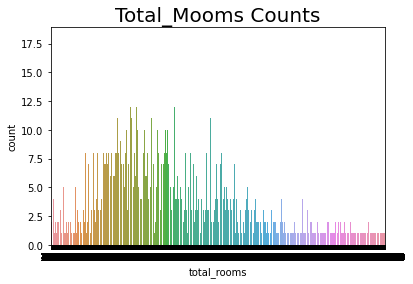

In [76]:
#countplot
sns.countplot(df['total_rooms'])
plt.title("Total_Mooms Counts", y=1, fontdict={"fontsize": 20})

In [77]:
T_Bedrooms=df['total_bedrooms'].value_counts()
T_Bedrooms

280.00     55
331.00     51
345.00     50
343.00     49
393.00     49
           ..
2961.00     1
1915.00     1
1215.00     1
3298.00     1
1052.00     1
Name: total_bedrooms, Length: 1923, dtype: int64

Text(0.5, 1, 'total_bedrooms Counts')

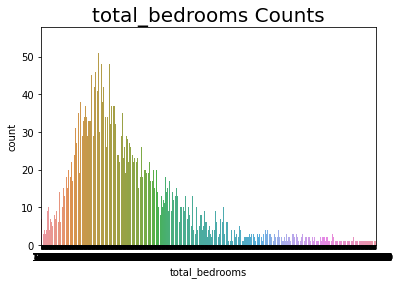

In [78]:
#countplot
sns.countplot(df['total_bedrooms'])
plt.title("total_bedrooms Counts", y=1, fontdict={"fontsize": 20})

In [79]:
T_populations=df['population'].value_counts()
T_populations 

891.00     25
761.00     24
1227.00    24
1052.00    24
850.00     24
           ..
2141.00     1
5546.00     1
3186.00     1
3590.00     1
6912.00     1
Name: population, Length: 3888, dtype: int64

In [80]:
df['population'].describe()

count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64

Text(0.5, 1, 'population Counts')

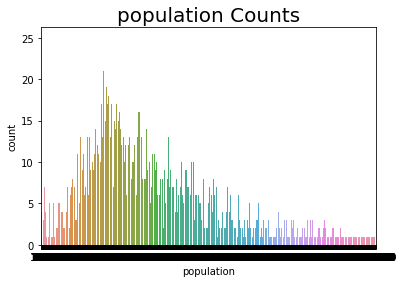

In [81]:
#countplot
sns.countplot(df['population'])
plt.title("population Counts", y=1, fontdict={"fontsize": 20})

In [82]:
House_Hold=df['households'].value_counts()
House_Hold  

306.00     57
386.00     56
335.00     56
282.00     55
429.00     54
           ..
2375.00     1
1133.00     1
2270.00     1
2528.00     1
1818.00     1
Name: households, Length: 1815, dtype: int64

In [83]:
df['households'].describe()

count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64

Text(0.5, 1, 'households Counts')

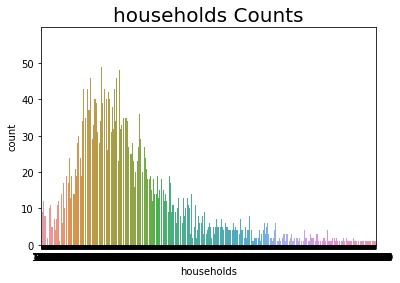

In [84]:
#countplot
sns.countplot(df['households'])
plt.title("households Counts", y=1, fontdict={"fontsize": 20})

In [85]:
Median_income=df['median_income'].value_counts()
Median_income   

3.12     49
15.00    49
2.88     46
2.62     44
4.12     44
         ..
4.08      1
4.18      1
6.18      1
6.43      1
2.09      1
Name: median_income, Length: 12928, dtype: int64

In [86]:
df['median_income'].describe()

count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64

Text(0.5, 1, 'median_income Counts')

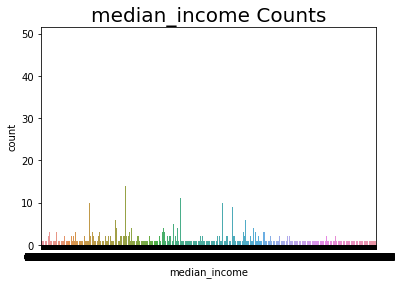

In [87]:
#countplot
sns.countplot(df['median_income'])
plt.title("median_income Counts", y=1, fontdict={"fontsize": 20})

In [88]:
Median_house_value=df['median_house_value'].value_counts()
Median_house_value

500001.00    965
137500.00    122
162500.00    117
112500.00    103
187500.00     93
            ... 
359200.00      1
54900.00       1
377600.00      1
81200.00       1
47000.00       1
Name: median_house_value, Length: 3842, dtype: int64

In [89]:
df['median_house_value'].describe()

count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64

Text(0.5, 1, 'median_house_value Counts')

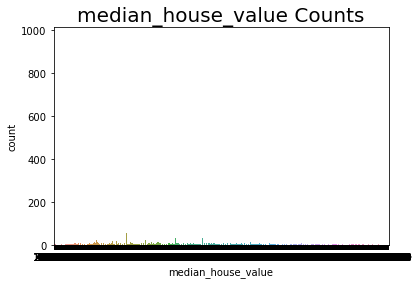

In [90]:
#countplot
sns.countplot(df['median_house_value'])
plt.title("median_house_value Counts", y=1, fontdict={"fontsize": 20})

## Q1. Which ocean_proximity has the highest number of counts of houses?

In [91]:
Ocean_proximity=df['ocean_proximity'].value_counts()
Ocean_proximity 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0.5, 1, 'ocean_proximity Counts')

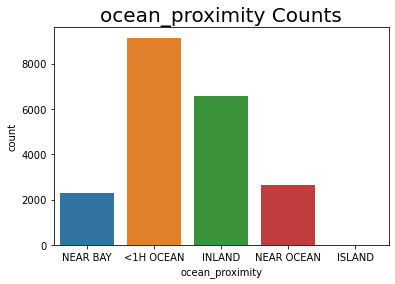

In [92]:
#countplot
sns.countplot(df['ocean_proximity'])
plt.title("ocean_proximity Counts", y=1, fontdict={"fontsize": 20}) 

## Q2. Is the median_house_value affected by ocean_proximity of housing? Yes, the median value of the island Houses is very high.

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

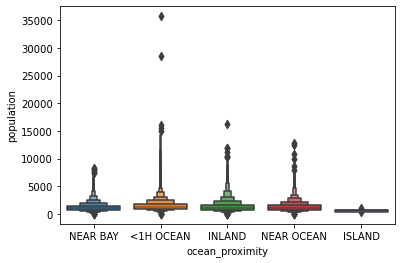

In [93]:
sns.boxenplot(y = 'population', x = 'ocean_proximity', data=df)

In [94]:
df.groupby(['ocean_proximity']).agg({'median_house_value':np.mean})

,median_house_value
ocean_proximity,
<1H OCEAN,240084.29
INLAND,124805.39
ISLAND,380440.00
NEAR BAY,259212.31
NEAR OCEAN,249433.98


## Q  Which ocean proximity houses with highest median_age and price? 

In [96]:
df.groupby(['ocean_proximity']).agg({"median_house_value":np.mean})

,median_house_value
ocean_proximity,
<1H OCEAN,240084.29
INLAND,124805.39
ISLAND,380440.00
NEAR BAY,259212.31
NEAR OCEAN,249433.98


Text(0, 0.5, 'median_house_value')

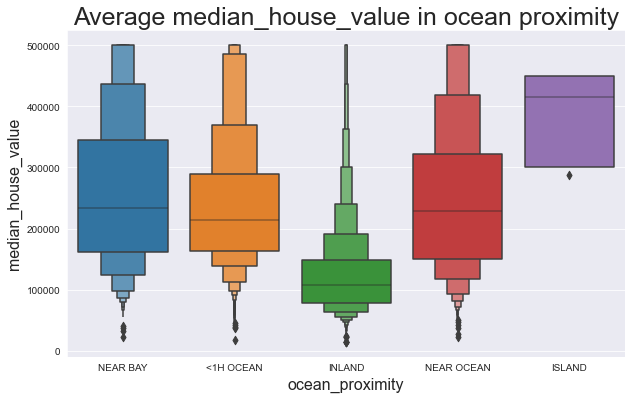

In [97]:
plt.figure(figsize=(10,6)) 
sns.set_style("darkgrid")
ax = sns.boxenplot(x = "ocean_proximity", y = "median_house_value", data = df,)
ax.set_title(label = "Average median_house_value in ocean proximity", fontsize = 25)
ax.set_xlabel(xlabel = "ocean_proximity",fontsize = 16)
ax.set_ylabel(ylabel = "median_house_value", fontsize = 16)

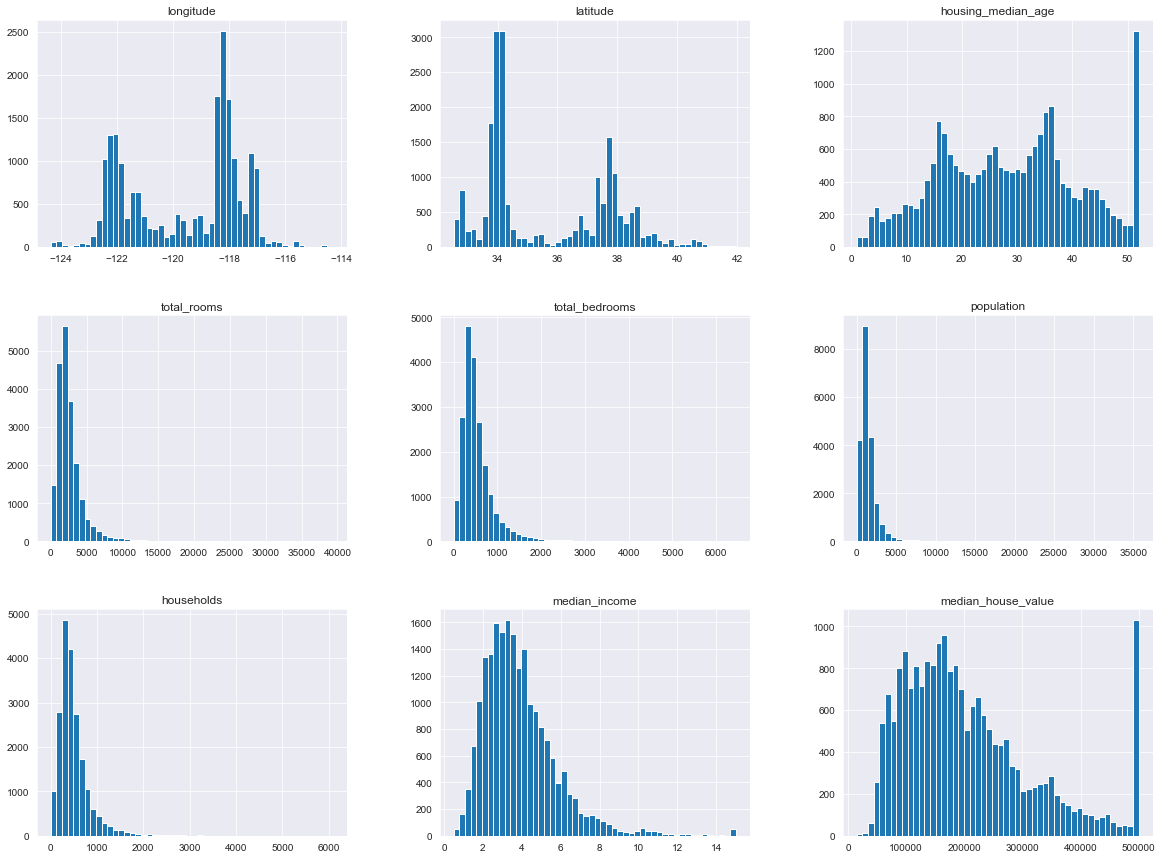

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

## 13. Outliers of the features 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.2+ MB


In [100]:
df['housing_median_age'].describe()

count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64

<AxesSubplot:ylabel='housing_median_age'>

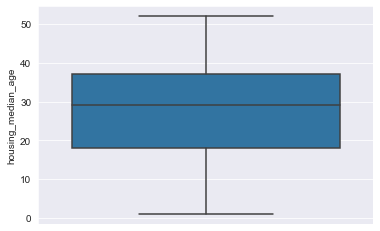

In [101]:
sns.boxplot( y=df['housing_median_age'] ) 

In [102]:
df['total_rooms'].describe()

count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64

<AxesSubplot:ylabel='total_rooms'>

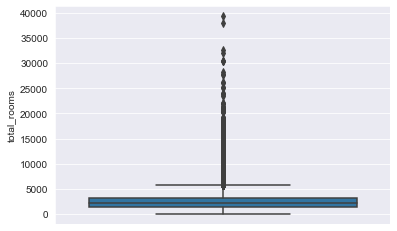

In [103]:
sns.boxplot( y=df['total_rooms'] ) 

In [104]:
df['total_bedrooms'].describe()

count   20433.00
mean      537.87
std       421.39
min         1.00
25%       296.00
50%       435.00
75%       647.00
max      6445.00
Name: total_bedrooms, dtype: float64

<AxesSubplot:ylabel='total_bedrooms'>

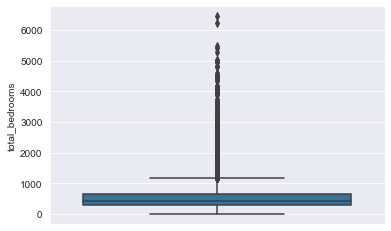

In [105]:
sns.boxplot( y=df['total_bedrooms'] ) 

In [106]:
df['population'].describe()

count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64

<AxesSubplot:ylabel='population'>

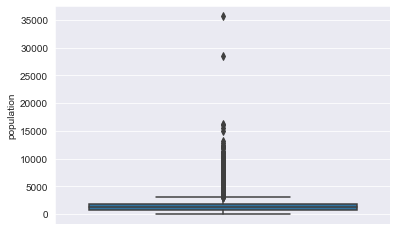

In [107]:
sns.boxplot( y=df['population'] ) 

In [108]:
df['households'].describe()

count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64

<AxesSubplot:ylabel='households'>

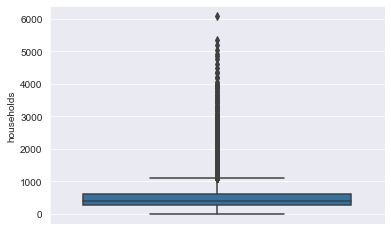

In [109]:
sns.boxplot( y=df['households'] ) 

In [110]:
df['median_income'].describe()

count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64

<AxesSubplot:ylabel='median_income'>

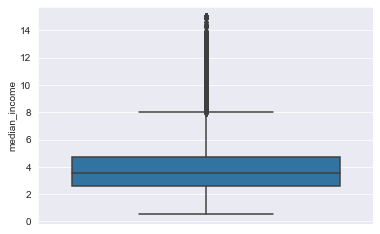

In [111]:
sns.boxplot( y=df['median_income'] ) 

In [112]:
df['median_house_value'].describe()

count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64

<AxesSubplot:ylabel='median_house_value'>

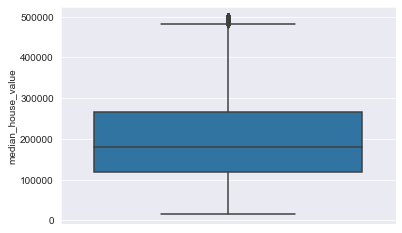

In [113]:
sns.boxplot( y=df['median_house_value'] ) 

In [114]:
df['longitude'].describe()

count   20640.00
mean     -119.57
std         2.00
min      -124.35
25%      -121.80
50%      -118.49
75%      -118.01
max      -114.31
Name: longitude, dtype: float64

<AxesSubplot:ylabel='longitude'>

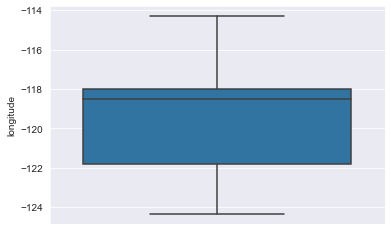

In [115]:
sns.boxplot( y=df['longitude'] ) 

In [116]:
df['latitude'].describe()

count   20640.00
mean       35.63
std         2.14
min        32.54
25%        33.93
50%        34.26
75%        37.71
max        41.95
Name: latitude, dtype: float64

<AxesSubplot:ylabel='latitude'>

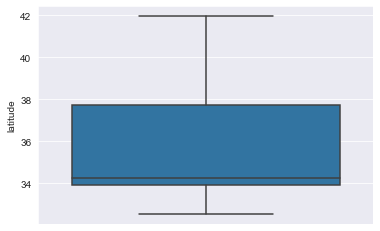

In [117]:
sns.boxplot( y=df['latitude'] ) 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.2+ MB


## Q. What the measure of despresion of the housing_median_age look like?

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

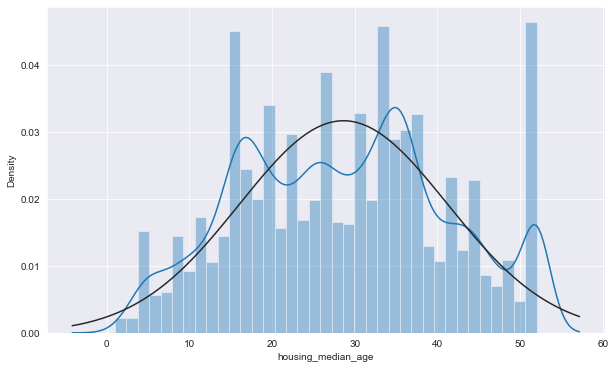

In [119]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(df['housing_median_age'], fit= norm)

In [120]:
#skewness and kurtosis
print("Skewness: %f" % df['housing_median_age'].skew())
print("Kurtosis: %f" % df['housing_median_age'].kurt())

Skewness: 0.060331
Kurtosis: -0.800629


In [121]:
#skewness and kurtosis
print("Skewness: %f" % df['population'].skew())
print("Kurtosis: %f" % df['population'].kurt())

Skewness: 4.935858
Kurtosis: 73.553116


<AxesSubplot:xlabel='population', ylabel='Density'>

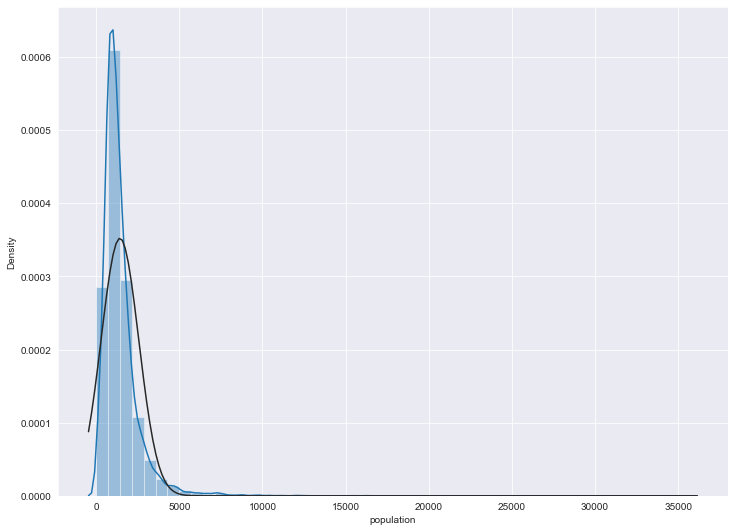

In [122]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(df['population'], fit= norm)

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

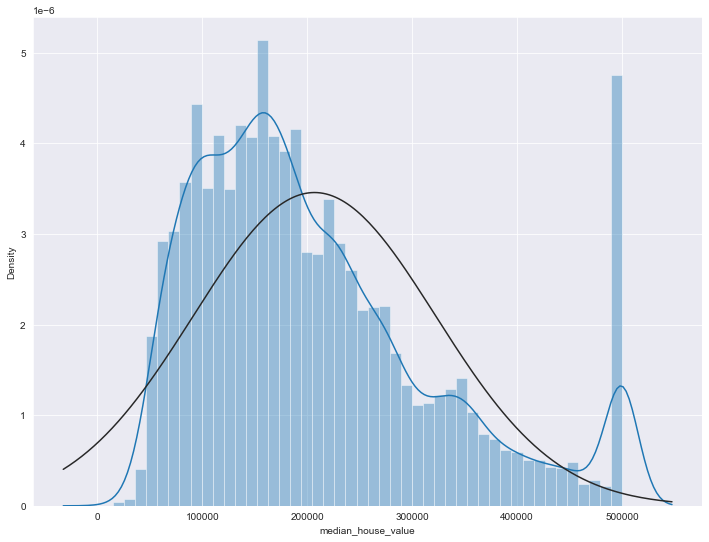

In [123]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(df['median_house_value'], fit= norm)

In [124]:
#skewness and kurtosis
print("Skewness: %f" % df['median_house_value'].skew())
print("Kurtosis: %f" % df['median_house_value'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


## Independence Test - Continous Vs Categorical variable 5 levels

### For test of independency you should run ANOVA after handling outilres or nonparametric test(Kruskal-Wallis test here)

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


## Q5. Is there any association between home housing_median_age and home ocean_proximity?
### Home median_house_value is continous and home ocean_proximity a categorical feature and will done by anova

In [126]:
df.groupby('ocean_proximity').agg({'median_house_value':'describe'})

median_house_value                                          \
                             count      mean       std       min       25%   
ocean_proximity                                                              
<1H OCEAN                  9136.00 240084.29 106124.29  17500.00 164100.00   
INLAND                     6551.00 124805.39  70007.91  14999.00  77500.00   
ISLAND                        5.00 380440.00  80559.56 287500.00 300000.00   
NEAR BAY                   2290.00 259212.31 122818.54  22500.00 162500.00   
NEAR OCEAN                 2658.00 249433.98 122477.15  22500.00 150000.00   

                                               
                      50%       75%       max  
ocean_proximity                                
<1H OCEAN       214850.00 289100.00 500001.00  
INLAND          108500.00 148950.00 500001.00  
ISLAND          414700.00 450000.00 450000.00  
NEAR BAY        233800.00 345700.00 500001.00  
NEAR OCEAN      229450.00 322750.00 500001.00

In [127]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [128]:
import researchpy as rp
rp.summary_cont(df['median_house_value'].groupby(df['ocean_proximity']))

,N,Mean,SD,SE,95% Conf.,Interval
ocean_proximity,,,,,,
<1H OCEAN,9136,240084.29,106124.29,1110.29,237907.87,242260.70
INLAND,6551,124805.39,70007.91,864.95,123109.80,126500.99
ISLAND,5,380440.00,80559.56,36027.33,280412.09,480467.91
NEAR BAY,2290,259212.31,122818.54,2566.53,254179.35,264245.28
NEAR OCEAN,2658,249433.98,122477.15,2375.62,244775.72,254092.24


## Anova

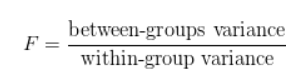

In [129]:
dfx=df.drop(df2[df2['median_house_value'].isnull()].index)

In [130]:
dfx=df.drop(df2[df2['median_house_value'].isnull()].index)

In [131]:
dfx.shape

(20640, 10)

In [132]:
dfx1=df.dropna(subset=['median_house_value'])
#df.dropna(subset=['Credit Score'], inplace=True)

In [133]:
dfx1.shape

(20640, 10)

In [134]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [135]:
import scipy.stats as stats
stats.f_oneway(dfx['median_house_value'][dfx['ocean_proximity']=='<1H OCEAN'],
               dfx['median_house_value'][dfx['ocean_proximity']=='INLAND'],
               dfx['median_house_value'][dfx['ocean_proximity']=='NEAR OCEAN'],
               dfx['median_house_value'][dfx['ocean_proximity']=='NEAR BAY'],
               dfx['median_house_value'][dfx['ocean_proximity']=='ISLAND']) 

F_onewayResult(statistic=1612.1407358838217, pvalue=0.0)

## Cheking Assupmtions:

## Checking Outliers

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

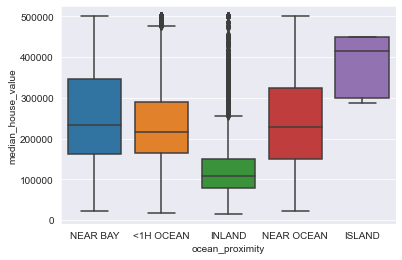

In [136]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

<AxesSubplot:title={'center':'median_house_value'}, xlabel='ocean_proximity'>

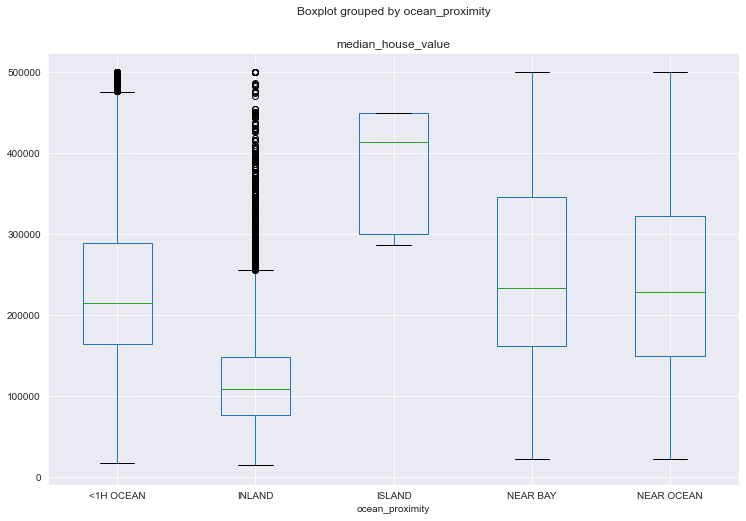

In [137]:
#or
#Create a boxplot
df.boxplot('median_house_value', by='ocean_proximity', figsize=(12, 8))

In [138]:
df['median_house_value'].describe()

count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64

## There is no major outliers

### Normality:

In [139]:
grp1=dfx[dfx['ocean_proximity']=='<1H OCEAN']['median_house_value']
grp2=dfx[dfx['ocean_proximity']=='INLAND']['median_house_value']
grp3=dfx[dfx['ocean_proximity']=='NEAR OCEAN']['median_house_value']
grp4=dfx[dfx['ocean_proximity']=='NEAR BAY']['median_house_value']
grp5=dfx[dfx['ocean_proximity']=='ISLAND']['median_house_value']

In [140]:
stats.shapiro(grp1)

ShapiroResult(statistic=0.9090849161148071, pvalue=0.0)

In [141]:
stats.shapiro(grp2)

ShapiroResult(statistic=0.8213609457015991, pvalue=0.0)

In [142]:
stats.shapiro(grp3)

ShapiroResult(statistic=0.9340225458145142, pvalue=8.74050652965817e-33)

In [143]:
stats.shapiro(grp4)

ShapiroResult(statistic=0.9378061294555664, pvalue=5.946083760696617e-30)

In [144]:
stats.shapiro(grp5)

ShapiroResult(statistic=0.8010945320129395, pvalue=0.0827135294675827)

#### p-value is less than 5% but rely on CLT I will skip normality assumption.( We can run Kruskal-Wallis test instead or try transformation )

In [145]:
stats.levene(dfx['median_house_value'][dfx['ocean_proximity'] == '<1H OCEAN'],
             dfx['median_house_value'][dfx['ocean_proximity'] == 'INLAND'],
             dfx['median_house_value'][dfx['ocean_proximity'] == 'NEAR OCEAN'],
             dfx['median_house_value'][dfx['ocean_proximity'] == 'NEAR BAY'],
             dfx['median_house_value'][dfx['ocean_proximity'] == 'ISLAND'])

LeveneResult(statistic=439.2305560263436, pvalue=0.0)

A general rule of thumb for equal variances is to compare the smallest and largest sample standard deviations. This is much like the rule of thumb for equal variances for the test for independent means. If the ratio of these two sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated.
https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1

In [146]:
df.groupby('ocean_proximity').agg({'median_house_value':'describe'})

median_house_value                                          \
                             count      mean       std       min       25%   
ocean_proximity                                                              
<1H OCEAN                  9136.00 240084.29 106124.29  17500.00 164100.00   
INLAND                     6551.00 124805.39  70007.91  14999.00  77500.00   
ISLAND                        5.00 380440.00  80559.56 287500.00 300000.00   
NEAR BAY                   2290.00 259212.31 122818.54  22500.00 162500.00   
NEAR OCEAN                 2658.00 249433.98 122477.15  22500.00 150000.00   

                                               
                      50%       75%       max  
ocean_proximity                                
<1H OCEAN       214850.00 289100.00 500001.00  
INLAND          108500.00 148950.00 500001.00  
ISLAND          414700.00 450000.00 450000.00  
NEAR BAY        233800.00 345700.00 500001.00  
NEAR OCEAN      229450.00 322750.00 500001.00

since the ratioof the smallest and largest sample standard deviations falls within 0.5 to 2, then it may be that the assumption is not violated. https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1

## Tukey HSD Post-Hoc-Test

In [148]:
import pingouin as pg

In [149]:
pt = pg.pairwise_tukey(dv='median_house_value', between='ocean_proximity', data=df)
print(pt)

           A           B   mean(A)   mean(B)       diff       se      T  \
0  <1H OCEAN      INLAND 240084.29 124805.39  115278.89  1630.87  70.69   
1  <1H OCEAN      ISLAND 240084.29 380440.00 -140355.71 45062.42  -3.11   
2  <1H OCEAN    NEAR BAY 240084.29 259212.31  -19128.03  2354.14  -8.13   
3  <1H OCEAN  NEAR OCEAN 240084.29 249433.98   -9349.69  2220.01  -4.21   
4     INLAND      ISLAND 124805.39 380440.00 -255634.61 45067.29  -5.67   
5     INLAND    NEAR BAY 124805.39 259212.31 -134406.92  2445.46 -54.96   
6     INLAND  NEAR OCEAN 124805.39 249433.98 -124628.59  2316.62 -53.80   
7     ISLAND    NEAR BAY 380440.00 259212.31  121227.69 45099.25   2.69   
8     ISLAND  NEAR OCEAN 380440.00 249433.98  131006.02 45092.45   2.91   
9   NEAR BAY  NEAR OCEAN 259212.31 249433.98    9778.33  2872.11   3.40   

   p-tukey  hedges  
0     0.00    1.14  
1     0.02   -1.39  
2     0.00   -0.19  
3     0.00   -0.09  
4     0.00   -2.54  
5     0.00   -1.33  
6     0.00   -1.24  
7     

## Method#2

In [150]:
from statsmodels.stats.multicomp import MultiComparison

In [151]:
#Use TukeyHSD to know which group mean are not similar.
#from statsmodels.stats.multicomp import MultiComparison
mul_comp = MultiComparison(df['median_house_value'],dfx['ocean_proximity'])
mul_result = mul_comp.tukeyhsd()
print(mul_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2     meandiff   p-adj     lower        upper     reject
-------------------------------------------------------------------------
<1H OCEAN     INLAND -115278.8935   -0.0 -119727.9273 -110829.8596   True
<1H OCEAN     ISLAND  140355.7145 0.0158   17424.7149  263286.7142   True
<1H OCEAN   NEAR BAY   19128.0263   -0.0   12705.8987   25550.1539   True
<1H OCEAN NEAR OCEAN     9349.692 0.0002    3293.4581   15405.9258   True
   INLAND     ISLAND   255634.608    0.0  132690.3424  378578.8736   True
   INLAND   NEAR BAY  134406.9198   -0.0  127735.6768  141078.1628   True
   INLAND NEAR OCEAN  124628.5854   -0.0  118308.7968  130948.3741   True
   ISLAND   NEAR BAY -121227.6882 0.0557 -244259.1568    1803.7804  False
   ISLAND NEAR OCEAN -131006.0226 0.0302 -254018.9345   -7993.1106   True
 NEAR BAY NEAR OCEAN   -9778.3344  0.006  -17613.4827    -1943.186   True
--------------------------------------

## If you don't want to skip Normality assumption you can apply Kruskal-Wallis Test

## Applying Kruskal-Wallis Test

In [152]:
stats.kruskal(grp1,grp2,grp3,grp4,grp5)

KruskalResult(statistic=6634.562916019417, pvalue=0.0)

## If you don't want to skip equality of variance assumption you can apply Welch't Anova

## Applying Welch's anova

In [153]:
import pingouin as pg

In [154]:
pg.welch_anova(dv='median_house_value', between='ocean_proximity', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,ocean_proximity,4,31.92,2079.26,0.00,0.24


In [155]:
pg.pairwise_gameshowell(dv='median_house_value', between='ocean_proximity', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,<1H OCEAN,INLAND,240084.29,124805.39,115278.89,1407.44,81.91,15582.92,0.00,1.33
1,<1H OCEAN,ISLAND,240084.29,380440.00,-140355.71,36044.44,-3.89,4.01,0.08,-1.74
2,<1H OCEAN,NEAR BAY,240084.29,259212.31,-19128.03,2796.39,-6.84,3197.86,0.00,-0.16
3,<1H OCEAN,NEAR OCEAN,240084.29,249433.98,-9349.69,2622.28,-3.57,3890.53,0.00,-0.08
4,INLAND,ISLAND,124805.39,380440.00,-255634.61,36037.71,-7.09,4.00,0.01,-3.17
5,INLAND,NEAR BAY,124805.39,259212.31,-134406.92,2708.36,-49.63,2825.75,0.00,-1.20
6,INLAND,NEAR OCEAN,124805.39,249433.98,-124628.59,2528.19,-49.30,3384.02,0.00,-1.13
7,ISLAND,NEAR BAY,380440.00,259212.31,121227.69,36118.63,3.36,4.04,0.12,1.50
8,ISLAND,NEAR OCEAN,380440.00,249433.98,131006.02,36105.57,3.63,4.03,0.09,1.62
9,NEAR BAY,NEAR OCEAN,259212.31,249433.98,9778.33,3497.24,2.80,4834.36,0.04,0.08


## Data Prepration

## """ Data Cleansing"""

## 1) Handling Duplicate Data

## 3) Handling Outliers

## Method 1: Mean and Standard Deviation Method

In [11]:
def outlier_detection(dftemp,var):
    sns.boxplot(x=df[var])
    mean1=df[var].mean()
    std1=df[var].std()
    Min1=mean1-3*std1
    Max1=mean1+3*std1
    print("Mean - 3 * standard deviation:",Min1,"\nMean + 3 * standard deviation:",Max1)
    if ((max(dftemp[var]) <Max1)& (min(dftemp[var])>Min1)):
        print("\nThere is no outlier in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    else: print("\nThere are some outliers in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)   
    return dftemp[var].describe()

Mean - 3 * standard deviation: -125.58029962786922 
Mean + 3 * standard deviation: -113.55910928685374

There is no outlier in 'longitude' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean     -119.57
std         2.00
min      -124.35
25%      -121.80
50%      -118.49
75%      -118.01
max      -114.31
Name: longitude, dtype: float64

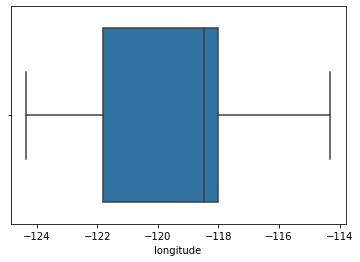

In [12]:
outlier_detection(df,'longitude')

Mean - 3 * standard deviation: -125.58029962786922 
Mean + 3 * standard deviation: -113.55910928685374

There is no outlier in 'longitude' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean     -119.57
std         2.00
min      -124.35
25%      -121.80
50%      -118.49
75%      -118.01
max      -114.31
Name: longitude, dtype: float64

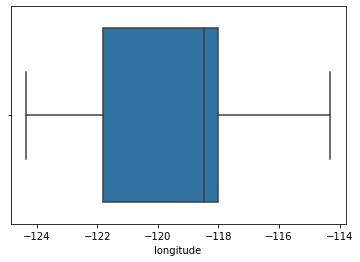

In [13]:
outlier_detection(df,'longitude')

In [14]:
df['housing_median_age'].describe()

count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64

Mean - 3 * standard deviation: -9.117186402226388 
Mean + 3 * standard deviation: 66.39615927044343

There is no outlier in 'housing_median_age' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64

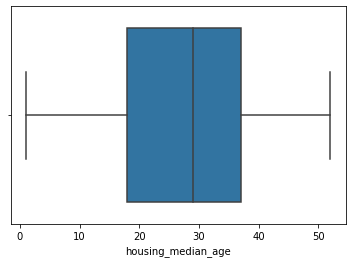

In [16]:
outlier_detection(df,'housing_median_age')

Mean - 3 * standard deviation: -3909.0826733530125 
Mean + 3 * standard deviation: 9180.60883614371

There are some outliers in 'total_rooms' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64

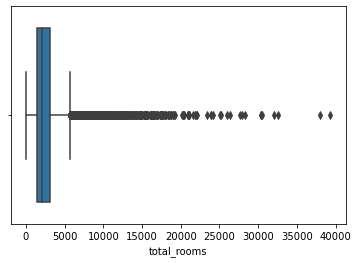

In [17]:
outlier_detection(df,'total_rooms')

Mean - 3 * standard deviation: -726.2846576845349 
Mean + 3 * standard deviation: 1802.0257627596584

There are some outliers in 'total_bedrooms' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20433.00
mean      537.87
std       421.39
min         1.00
25%       296.00
50%       435.00
75%       647.00
max      6445.00
Name: total_bedrooms, dtype: float64

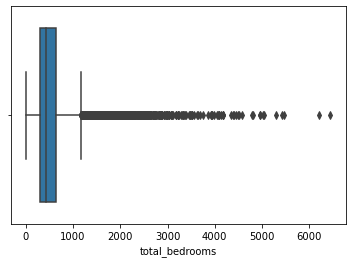

In [18]:
outlier_detection(df,'total_bedrooms')

Mean - 3 * standard deviation: -1971.909621109966 
Mean + 3 * standard deviation: 4822.863109482059

There are some outliers in 'population' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64

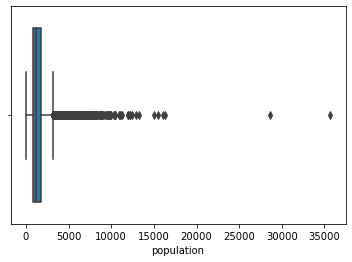

In [19]:
outlier_detection(df,'population')

Mean - 3 * standard deviation: -647.4495782622716 
Mean + 3 * standard deviation: 1646.5289387273879

There are some outliers in 'households' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64

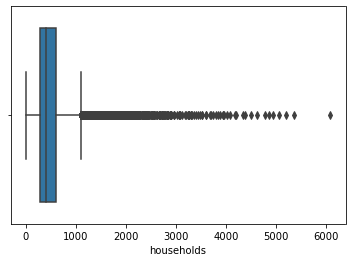

In [20]:
outlier_detection(df,'households')

Mean - 3 * standard deviation: -1.828794150928795 
Mean + 3 * standard deviation: 9.570136156742844

There are some outliers in 'median_income' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64

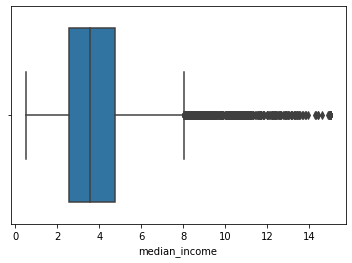

In [21]:
outlier_detection(df,'median_income')

Mean - 3 * standard deviation: -139331.03071432488 
Mean + 3 * standard deviation: 553042.6645321543

There is no outlier in 'median_house_value' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64

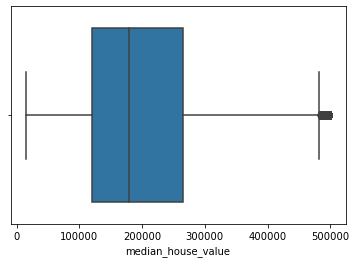

In [22]:
outlier_detection(df,'median_house_value')

In [ ]:
df_orginal1=df.copy()

## Fixing Outliers

In [24]:
#the following UDF is for assigning 1 to outlires and 0 otherwise
# i will add new column with the same value then I use this function to change its value to 0 and 1
def colunm_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25) # finding 1st quartile(lowe quartile)
    Q3=df[col].quantile(0.75) # finding 3rd quartile(upper quartile)
    IQR=Q3-Q1 #calculationg Inter Quartile Range
    UOF=Q3+3*(IQR)#UOF=upper outer fence
    LOF=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF:   
            Clean_col.append(1)# if value is less than LOF we will repalce that with 1
            i+=1
        elif val>UOF :  # if value is bigger than UOF we will repalce that with 1 
            Clean_col.append(1)
            j+=1
        else : Clean_col.append(0)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.countplot(df[col])#Plotting univariate distributions
    print(f'Number of outliers that they are less than lower outer fence({LOF}): ',i,f'\nNumber of outliers that they are bigger than upper outer fence ({UOF}) : ',j)
    return df[col] .value_counts()

## Log transformation of the variables: Using Log

<AxesSubplot:xlabel='housing_median_age'>

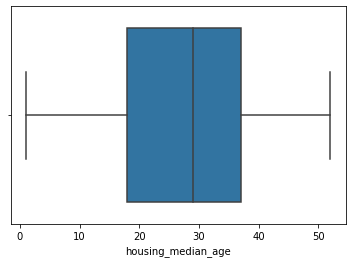

In [25]:
sns.boxplot(x=df['housing_median_age'])

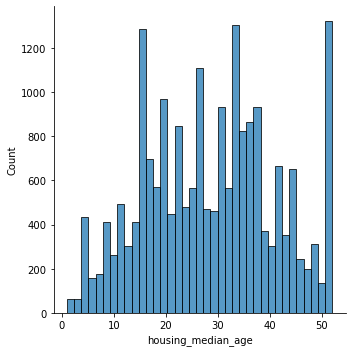

In [26]:
sns.displot(df['housing_median_age'])

In [27]:
df['housing_median_age'].describe()

count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64

In [28]:
df['housing_median_age']=np.log(df['housing_median_age'])

In [29]:
df['housing_median_age'].describe()

count   20640.00
mean        3.23
std         0.57
min         0.00
25%         2.89
50%         3.37
75%         3.61
max         3.95
Name: housing_median_age, dtype: float64

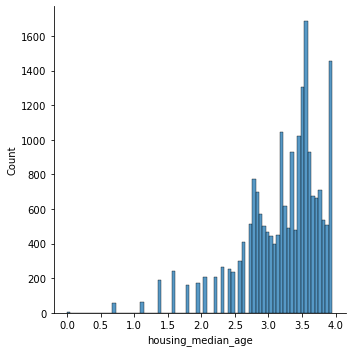

In [30]:
sns.displot(df['housing_median_age'])

<AxesSubplot:xlabel='median_house_value'>

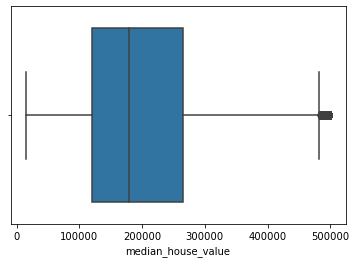

In [31]:
sns.boxplot(x=df['median_house_value'])

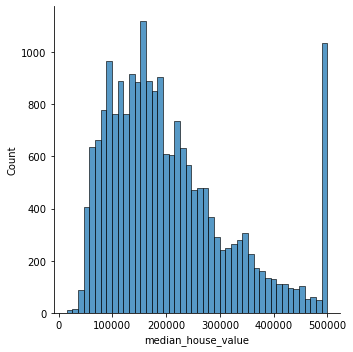

In [32]:
sns.displot(df['median_house_value'])

In [33]:
df['population'].describe()

count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64

In [34]:
df['population']=np.log(df['population'])

In [35]:
df['population'].describe()

count   20640.00
mean        7.02
std         0.74
min         1.10
25%         6.67
50%         7.06
75%         7.45
max        10.48
Name: population, dtype: float64

In [36]:
df['population outlier']=df['population']

Number of outliers that they are less than lower outer fence(4.313966005273233):  173 
Number of outliers that they are bigger than upper outer fence (9.80724457260963) :  2


0    20465
1      175
Name: population outlier, dtype: int64

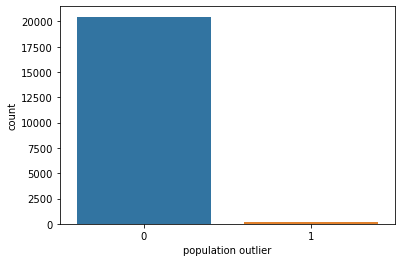

In [37]:
colunm_outliers('population outlier') # Here I will ignore outlires after tranformation 

In [38]:
df['median_house_value'].describe()

count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64

In [39]:
df['median_house_value']=np.log(df['median_house_value'])

In [40]:
df['median_house_value'].describe()

count   20640.00
mean       12.08
std         0.57
min         9.62
25%        11.69
50%        12.10
75%        12.49
max        13.12
Name: median_house_value, dtype: float64

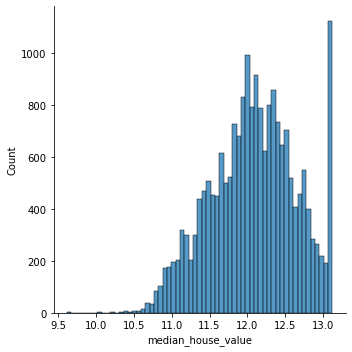

In [41]:
sns.displot(df['median_house_value'])

<AxesSubplot:xlabel='total_rooms'>

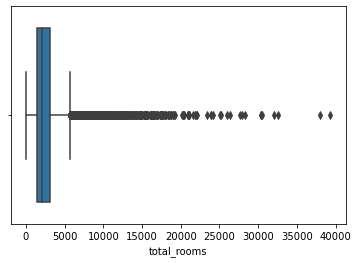

In [42]:
sns.boxplot(x=df['total_rooms'])

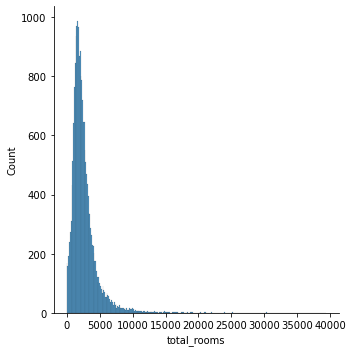

In [43]:
sns.displot(df['total_rooms'])

In [44]:
df['total_rooms'].describe()

count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64

In [45]:
df['total_rooms']=np.log(df['total_rooms'])

In [46]:
df['total_rooms'].describe()

count   20640.00
mean        7.63
std         0.75
min         0.69
25%         7.28
50%         7.66
75%         8.05
max        10.58
Name: total_rooms, dtype: float64

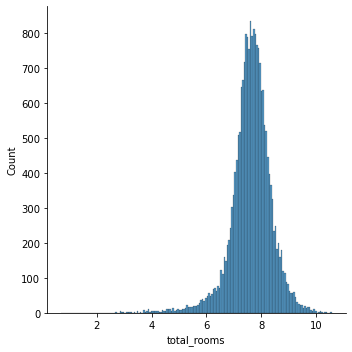

In [47]:
sns.displot(df['total_rooms'])

In [48]:
#I will create new column with  the same values then I will cahnge  value of it  to 1 if it is outlier otherwise to 0 by using
# colunm_outlier function
df['total_rooms outlier']=df['total_rooms']

Number of outliers that they are less than lower outer fence(4.947495616856585):  181 
Number of outliers that they are bigger than upper outer fence (10.384792854047825) :  3


0    20456
1      184
Name: total_rooms outlier, dtype: int64

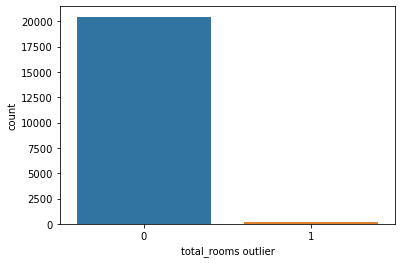

In [49]:
colunm_outliers('total_rooms outlier') # Here I will ignore outlires after tranformation 

<AxesSubplot:xlabel='total_bedrooms'>

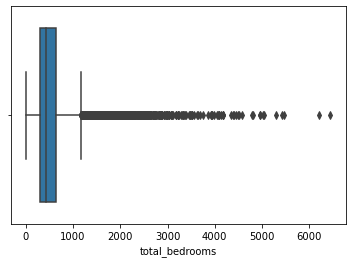

In [50]:
sns.boxplot(x=df['total_bedrooms'])

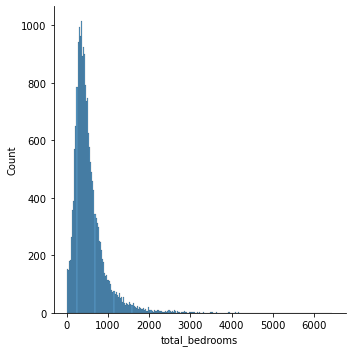

In [51]:
sns.displot(df['total_bedrooms'])

In [52]:
df['total_bedrooms'].describe()

count   20433.00
mean      537.87
std       421.39
min         1.00
25%       296.00
50%       435.00
75%       647.00
max      6445.00
Name: total_bedrooms, dtype: float64

In [53]:
df['total_bedrooms']=np.log(df['total_bedrooms'])

In [54]:
df['total_bedrooms'].describe()

count   20433.00
mean        6.05
std         0.73
min         0.00
25%         5.69
50%         6.08
75%         6.47
max         8.77
Name: total_bedrooms, dtype: float64

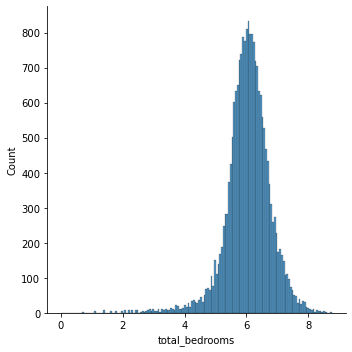

In [55]:
sns.displot(df['total_bedrooms'])

In [56]:
#I will create new column with  the same values then I will cahnge  value of it  to 1 if it is outlier otherwise to 0 by using
# colunm_outlier function
df['total_bedrooms outlier']=df['total_bedrooms']

Number of outliers that they are less than lower outer fence(3.3443989337935376):  165 
Number of outliers that they are bigger than upper outer fence (8.818306815031423) :  0


0    20475
1      165
Name: total_bedrooms outlier, dtype: int64

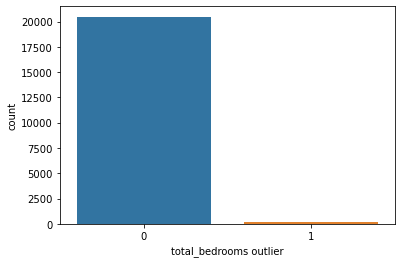

In [57]:
colunm_outliers('total_bedrooms outlier') # Here I will ignore outlires after tranformation 

<AxesSubplot:xlabel='households'>

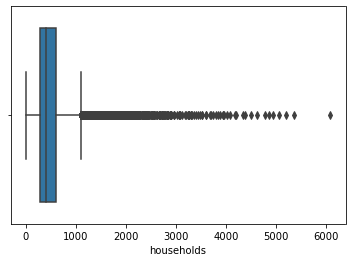

In [58]:
sns.boxplot(x=df['households'])

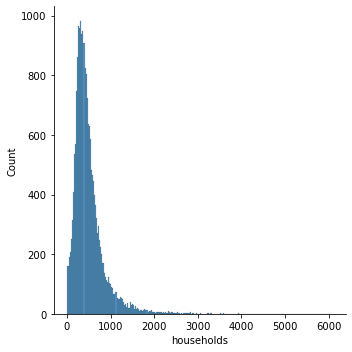

In [59]:
sns.displot(df['households'])

In [60]:
df['households'].describe()

count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64

In [61]:
df['households']=np.log(df['households'])

In [62]:
df['households'].describe()

count   20640.00
mean        5.98
std         0.73
min         0.00
25%         5.63
50%         6.01
75%         6.41
max         8.71
Name: households, dtype: float64

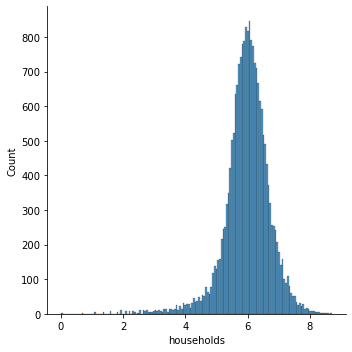

In [63]:
 sns.displot(df['households'])

In [64]:
#I will create new column with  the same values then I will cahnge  value of it  to 1 if it is outlier otherwise to 0 by using
# colunm_outlier function
df['households outlier']=df['households']

Number of outliers that they are less than lower outer fence(3.3234730385844715):  185 
Number of outliers that they are bigger than upper outer fence (8.71654502261562) :  0


0    20455
1      185
Name: households outlier, dtype: int64

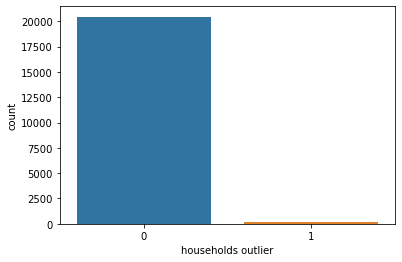

In [65]:
colunm_outliers('households outlier') # Here I will ignore outlires after tranformation 

<AxesSubplot:ylabel='median_income'>

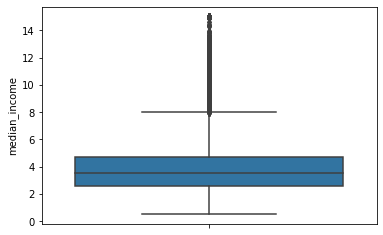

In [66]:
sns.boxplot(y=df['median_income'])

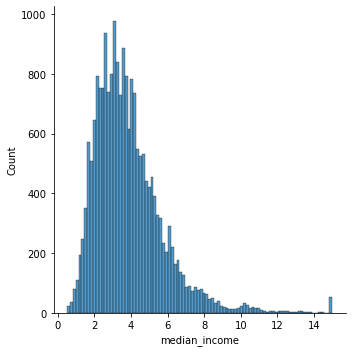

In [67]:
sns.displot(df['median_income'])

In [68]:
df['median_income'].describe() # There is one value(0.50) less value and its log value is negative and hence no need of converting to log

count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64

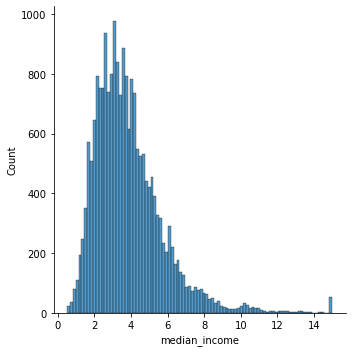

In [69]:
sns.displot(df['median_income'])

In [70]:
#I will create new column with  the same values then I will cahnge  value of it  to 1 if it is outlier otherwise to 0 by using
# colunm_outlier function
df['median_income outlier']=df['median_income']

Number of outliers that they are less than lower outer fence(-3.9761500000000005):  0 
Number of outliers that they are bigger than upper outer fence (11.2828) :  140


0    20500
1      140
Name: median_income outlier, dtype: int64

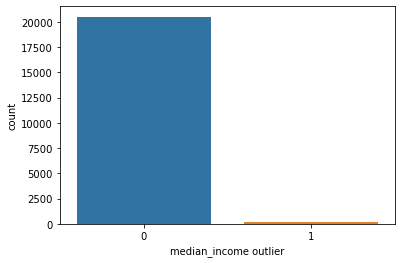

In [71]:
colunm_outliers('median_income outlier') # Here I will ignore outlires after tranformation 

In [72]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population outlier,total_rooms outlier,total_bedrooms outlier,households outlier,median_income outlier
0,-122.23,37.88,3.71,6.78,4.86,5.77,4.84,8.33,13.02,NEAR BAY,0,0,0,0,0
1,-122.22,37.86,3.04,8.87,7.01,7.78,7.04,8.30,12.79,NEAR BAY,0,0,0,0,0
2,-122.24,37.85,3.95,7.29,5.25,6.21,5.18,7.26,12.77,NEAR BAY,0,0,0,0,0
3,-122.25,37.85,3.95,7.15,5.46,6.32,5.39,5.64,12.74,NEAR BAY,0,0,0,0,0
4,-122.25,37.85,3.95,7.39,5.63,6.34,5.56,3.85,12.74,NEAR BAY,0,0,0,0,0


In [73]:
#I want to replace values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25) # finding 1st quartile(lowe quartile)
    Q3=df[col].quantile(0.75) # finding 3rd quartile(upper quartile)
    IQR=Q3-Q1 #calculationg Inter Quartile Range
    UOF1=Q3+3*(IQR)#UOF=upper outer fence
    LOF1=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create an ematy list to append value to it
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF1:   
            Clean_col.append(LOF1)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF1 :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF1)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print(f'Number of outliers that they are less than lower outer fence({LOF1}): ',i,f'\nNumber of outliers that they are bigger than upper outer fence ({UOF1}) : ',j)
    return df[col] .describe()

## fixing_outliers of variables  

<AxesSubplot:ylabel='total_rooms'>

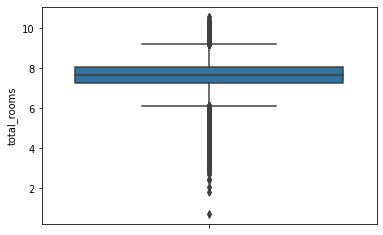

In [74]:
sns.boxplot(y=df['total_rooms'])

Number of outliers that they are less than lower outer fence(4.947495616856585):  181 
Number of outliers that they are bigger than upper outer fence (10.384792854047825) :  3


0    20456
1      184
Name: total_rooms outlier, dtype: int64

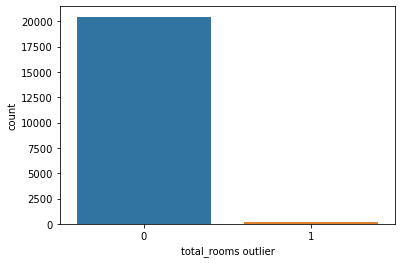

In [75]:
df['total_rooms outlier']=df['total_rooms']
colunm_outliers('total_rooms outlier')

Number of outliers that they are less than lower outer fence(4.947495616856585):  181 
Number of outliers that they are bigger than upper outer fence (10.384792854047825) :  3


count   20640.00
mean        7.64
std         0.72
min         4.95
25%         7.28
50%         7.66
75%         8.05
max        10.38
Name: total_rooms, dtype: float64

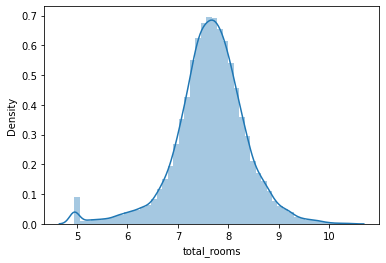

In [76]:
fixing_outliers('total_rooms')

<AxesSubplot:ylabel='total_bedrooms'>

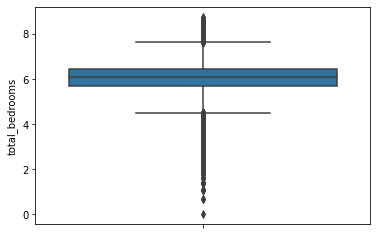

In [77]:
sns.boxplot(y=df['total_bedrooms'])

Number of outliers that they are less than lower outer fence(3.3443989337935376):  165 
Number of outliers that they are bigger than upper outer fence (8.818306815031423) :  0


0    20475
1      165
Name: total_bedrooms outlier, dtype: int64

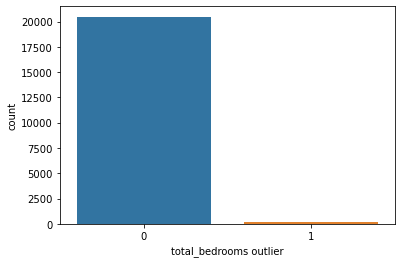

In [78]:
df['total_bedrooms outlier']=df['total_bedrooms']
colunm_outliers('total_bedrooms outlier')

Number of outliers that they are less than lower outer fence(3.3443989337935376):  165 
Number of outliers that they are bigger than upper outer fence (8.818306815031423) :  0


count   20433.00
mean        6.06
std         0.70
min         3.34
25%         5.69
50%         6.08
75%         6.47
max         8.77
Name: total_bedrooms, dtype: float64

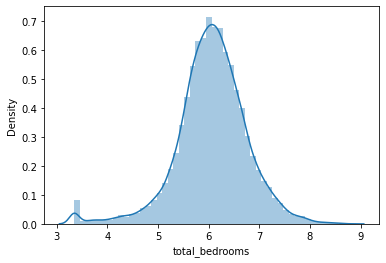

In [79]:
fixing_outliers('total_bedrooms')

<AxesSubplot:xlabel='population'>

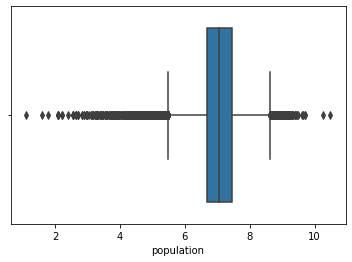

In [80]:
sns.boxplot(x=df['population'])

Number of outliers that they are less than lower outer fence(4.313966005273233):  173 
Number of outliers that they are bigger than upper outer fence (9.80724457260963) :  2


0    20465
1      175
Name: population outlier, dtype: int64

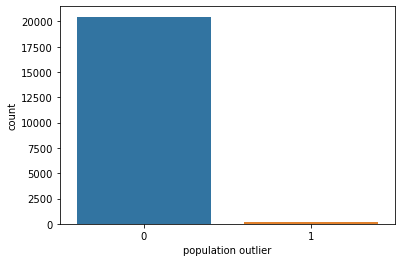

In [81]:
df['population outlier']=df['population']
colunm_outliers('population outlier')

Number of outliers that they are less than lower outer fence(4.313966005273233):  173 
Number of outliers that they are bigger than upper outer fence (9.80724457260963) :  2


count   20640.00
mean        7.03
std         0.71
min         4.31
25%         6.67
50%         7.06
75%         7.45
max         9.81
Name: population, dtype: float64

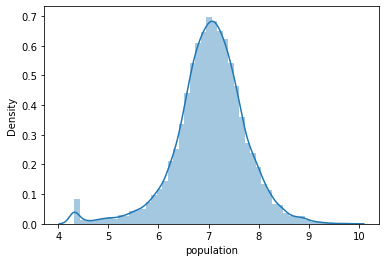

In [82]:
fixing_outliers('population')

<AxesSubplot:ylabel='households'>

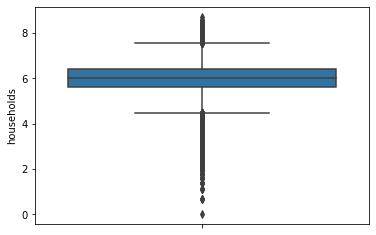

In [83]:
sns.boxplot(y=df['households'])

Number of outliers that they are less than lower outer fence(3.3234730385844715):  185 
Number of outliers that they are bigger than upper outer fence (8.71654502261562) :  0


0    20455
1      185
Name: households outlier, dtype: int64

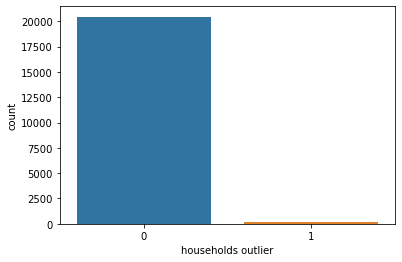

In [84]:
df['households outlier']=df['households']
colunm_outliers('households outlier')

Number of outliers that they are less than lower outer fence(3.3234730385844715):  185 
Number of outliers that they are bigger than upper outer fence (8.71654502261562) :  0


count   20640.00
mean        5.99
std         0.70
min         3.32
25%         5.63
50%         6.01
75%         6.41
max         8.71
Name: households, dtype: float64

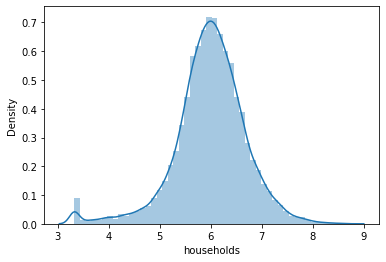

In [85]:
fixing_outliers('households')

<AxesSubplot:ylabel='median_income'>

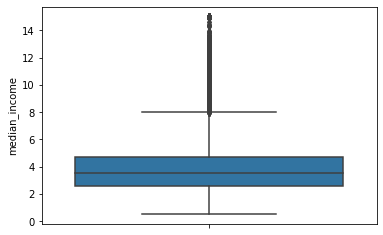

In [86]:
sns.boxplot(y=df['median_income'])

Number of outliers that they are less than lower outer fence(-3.9761500000000005):  0 
Number of outliers that they are bigger than upper outer fence (11.2828) :  140


0    20500
1      140
Name: median_income outlier, dtype: int64

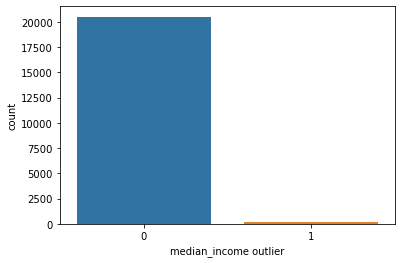

In [87]:
df['median_income outlier']=df['median_income']
colunm_outliers('median_income outlier')

Number of outliers that they are less than lower outer fence(-3.9761500000000005):  0 
Number of outliers that they are bigger than upper outer fence (11.2828) :  140


count   20640.00
mean        3.86
std         1.83
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        11.28
Name: median_income, dtype: float64

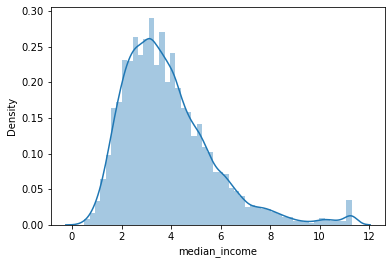

In [88]:
fixing_outliers('median_income')

## Method 2 :LOF

## 3)Handling Missing Values

# Missing values

we have several method for handling  missing values, but before using any method you should try to understand business and data and type of missing value, for example sometimes missing values means 0 as an example claim column in isnsurance data set if we don't have any amount for claim , ussually that means o .

### Values may be missing for multiple reasons such as non-response due to sensitivity of the information, data entry error, censoring, etc. Without understanding the reason, replacing missing values might lead to faulty analysis.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).For example, if you ask people about their age or their salary people who feel they are old or people with high salaries or very low salaries may not like to disclose it.  

#### MCAR: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature). The buildings within a block might be no bed rooms and hence missing values has no association with other features of the data set

In [89]:
percentage_of_miss()

,Number of Missing,Percentage
total_bedrooms,207,1.00
longitude,0,0.00
latitude,0,0.00
housing_median_age,0,0.00
total_rooms,0,0.00
population,0,0.00
households,0,0.00
median_income,0,0.00
median_house_value,0,0.00
ocean_proximity,0,0.00


In [91]:
df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms            207
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
population outlier          0
total_rooms outlier         0
total_bedrooms outlier      0
households outlier          0
median_income outlier       0
dtype: int64

## Impute / Replace Missing Values with Median

## Feature Engineering

### 2)Encoding

### 2-2) One hot encoding

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20640 non-null  float64
 1   latitude                20640 non-null  float64
 2   housing_median_age      20640 non-null  float64
 3   total_rooms             20640 non-null  float64
 4   total_bedrooms          20433 non-null  float64
 5   population              20640 non-null  float64
 6   households              20640 non-null  float64
 7   median_income           20640 non-null  float64
 8   median_house_value      20640 non-null  float64
 9   ocean_proximity         20640 non-null  object 
 10  population outlier      20640 non-null  int64  
 11  total_rooms outlier     20640 non-null  int64  
 12  total_bedrooms outlier  20640 non-null  int64  
 13  households outlier      20640 non-null  int64  
 14  median_income outlier   20640 non-null

In [93]:
df_orginal2=df.copy()

In [94]:
df= pd.get_dummies(df, drop_first=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   population outlier          20640 non-null  int64  
 10  total_rooms outlier         20640 non-null  int64  
 11  total_bedrooms outlier      20640 non-null  int64  
 12  households outlier          20640 non-null  int64  
 13  median_income outlier       206

## At this stage, I have  4 levels for ocean_proximity feature and dummies added 3 more features 

In [96]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population outlier,total_rooms outlier,total_bedrooms outlier,households outlier,median_income outlier,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,3.71,6.78,4.86,5.77,4.84,8.33,13.02,0,0,0,0,0,0,0,1,0
1,-122.22,37.86,3.04,8.87,7.01,7.78,7.04,8.30,12.79,0,0,0,0,0,0,0,1,0
2,-122.24,37.85,3.95,7.29,5.25,6.21,5.18,7.26,12.77,0,0,0,0,0,0,0,1,0
3,-122.25,37.85,3.95,7.15,5.46,6.32,5.39,5.64,12.74,0,0,0,0,0,0,0,1,0
4,-122.25,37.85,3.95,7.39,5.63,6.34,5.56,3.85,12.74,0,0,0,0,0,0,0,1,0


In [97]:
df.astype('object').describe().transpose()

,count,unique,top,freq
longitude,20640.00,844.00,-118.31,162.00
latitude,20640.00,862.00,34.06,244.00
housing_median_age,20640.00,52.00,3.95,1273.00
total_rooms,20640.00,5828.00,4.95,181.00
total_bedrooms,20433.00,1896.00,3.34,165.00
population,20640.00,3827.00,4.31,173.00
households,20640.00,1789.00,3.32,185.00
median_income,20640.00,12838.00,11.28,140.00
median_house_value,20640.00,3842.00,13.12,965.00
population outlier,20640.00,2.00,0.00,20465.00


# Handling Missing Values(contd.)

## Dropping Irrelevant Feature 2

In [ ]:
# dropping features are only for identification:
#In this data set I don't need to use  altitiude and longitude for house price ridiction. Hence, I droped it after wards not to see them for further analysis   
df3= df2.drop(labels=['longitude','latitude'], axis=1, inplace=True)

In [ ]:
type(df)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   total_rooms                 20640 non-null  float64
 2   total_bedrooms              20433 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  float64
 7   ocean_proximity_INLAND      20640 non-null  uint8  
 8   ocean_proximity_ISLAND      20640 non-null  uint8  
 9   ocean_proximity_NEAR BAY    20640 non-null  uint8  
 10  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
 11  total_rooms outlier         20640 non-null  int64  
 12  total_bedrooms outlier      20640 non-null  int64  
 13  population outlier          206

In [165]:
cor = df.corr()['median_house_value'].sort_values(ascending=False)

# Print the correlations
print(cor)

median_house_value            1.00
median_income                 0.69
median_income outlier         0.20
ocean_proximity_NEAR BAY      0.16
total_rooms                   0.16
ocean_proximity_NEAR OCEAN    0.14
housing_median_age            0.11
households                    0.07
total_bedrooms                0.06
total_rooms outlier           0.04
ocean_proximity_ISLAND        0.02
households outlier            0.02
total_bedrooms outlier        0.01
population outlier           -0.01
population                   -0.03
ocean_proximity_INLAND       -0.48
Name: median_house_value, dtype: float64


## Replacing  missing values by median

In [99]:
df['households_discrete']=pd.cut(df['households'],10)#I added new column and I did discritization by deviding values of total_rooms to 10 different bins 

In [100]:
# group by 'total_rooms_discrete' and fill in missing value by median of total_bedrooms of that group

df['total_bedrooms']= df.groupby('households_discrete')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))

In [101]:
df=df.drop('households_discrete',axis=1)

In [102]:
percentage_of_miss()

,Number of Missing,Percentage
longitude,0,0.00
latitude,0,0.00
ocean_proximity_NEAR BAY,0,0.00
ocean_proximity_ISLAND,0,0.00
ocean_proximity_INLAND,0,0.00
median_income outlier,0,0.00
households outlier,0,0.00
total_bedrooms outlier,0,0.00
total_rooms outlier,0,0.00
population outlier,0,0.00


## Correlation

<AxesSubplot:>

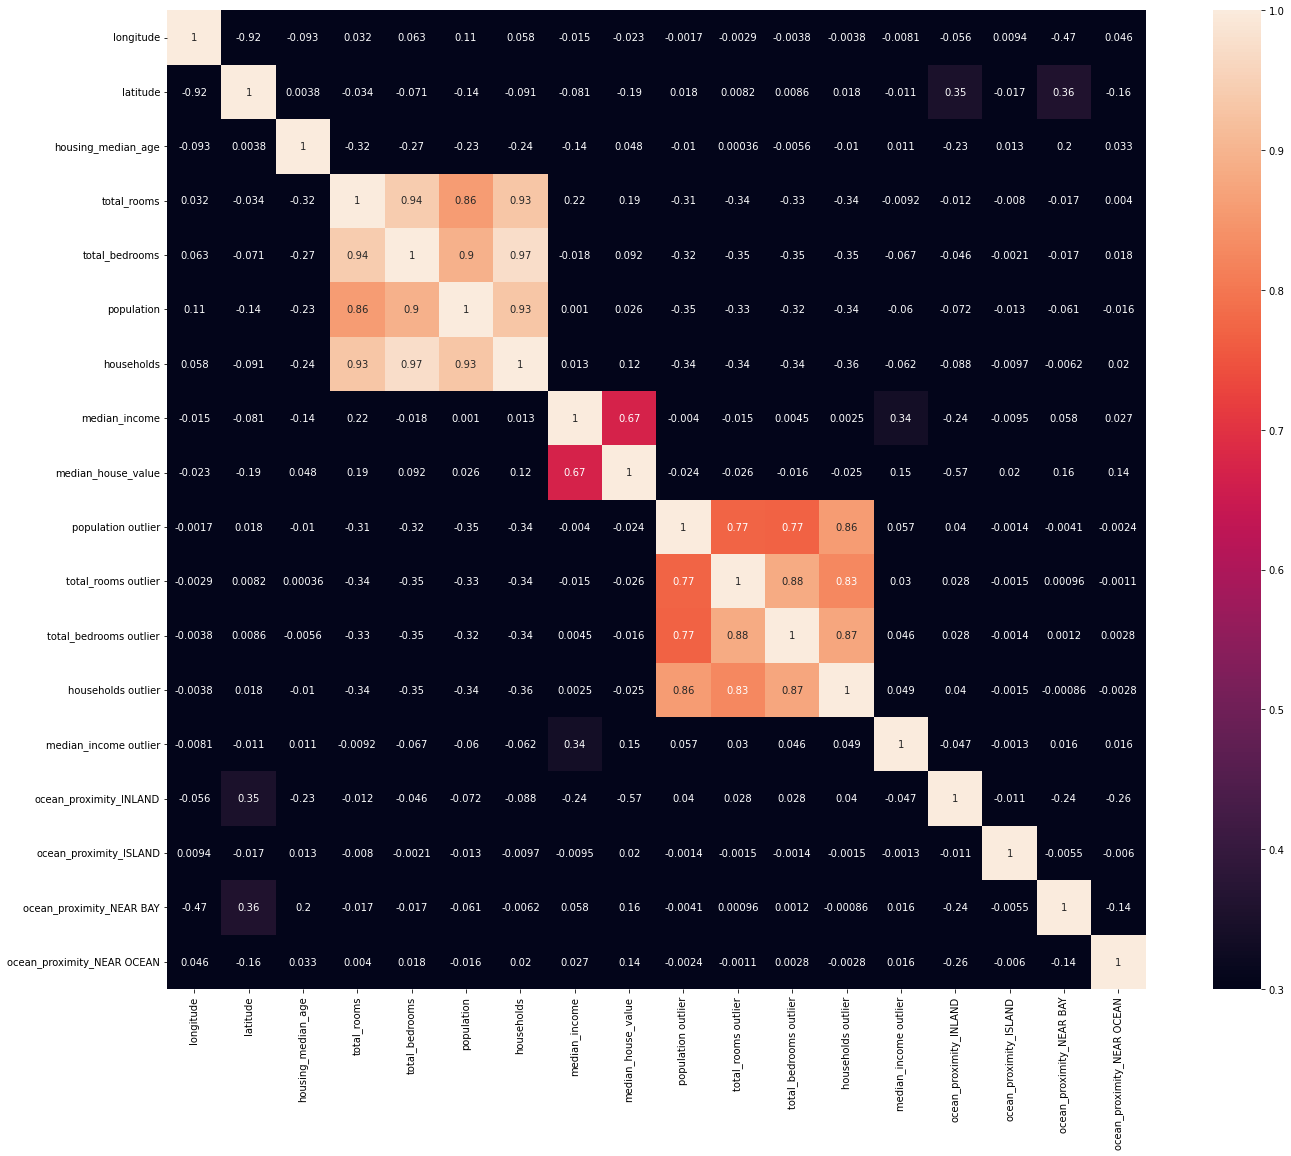

In [103]:
corr=df.corr()
f, ax = plt.subplots(figsize=(24,18))
sns.heatmap(corr,vmax=1, vmin=0.3, square=True, annot=True)#vmin, vmaxfloats, optional:Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

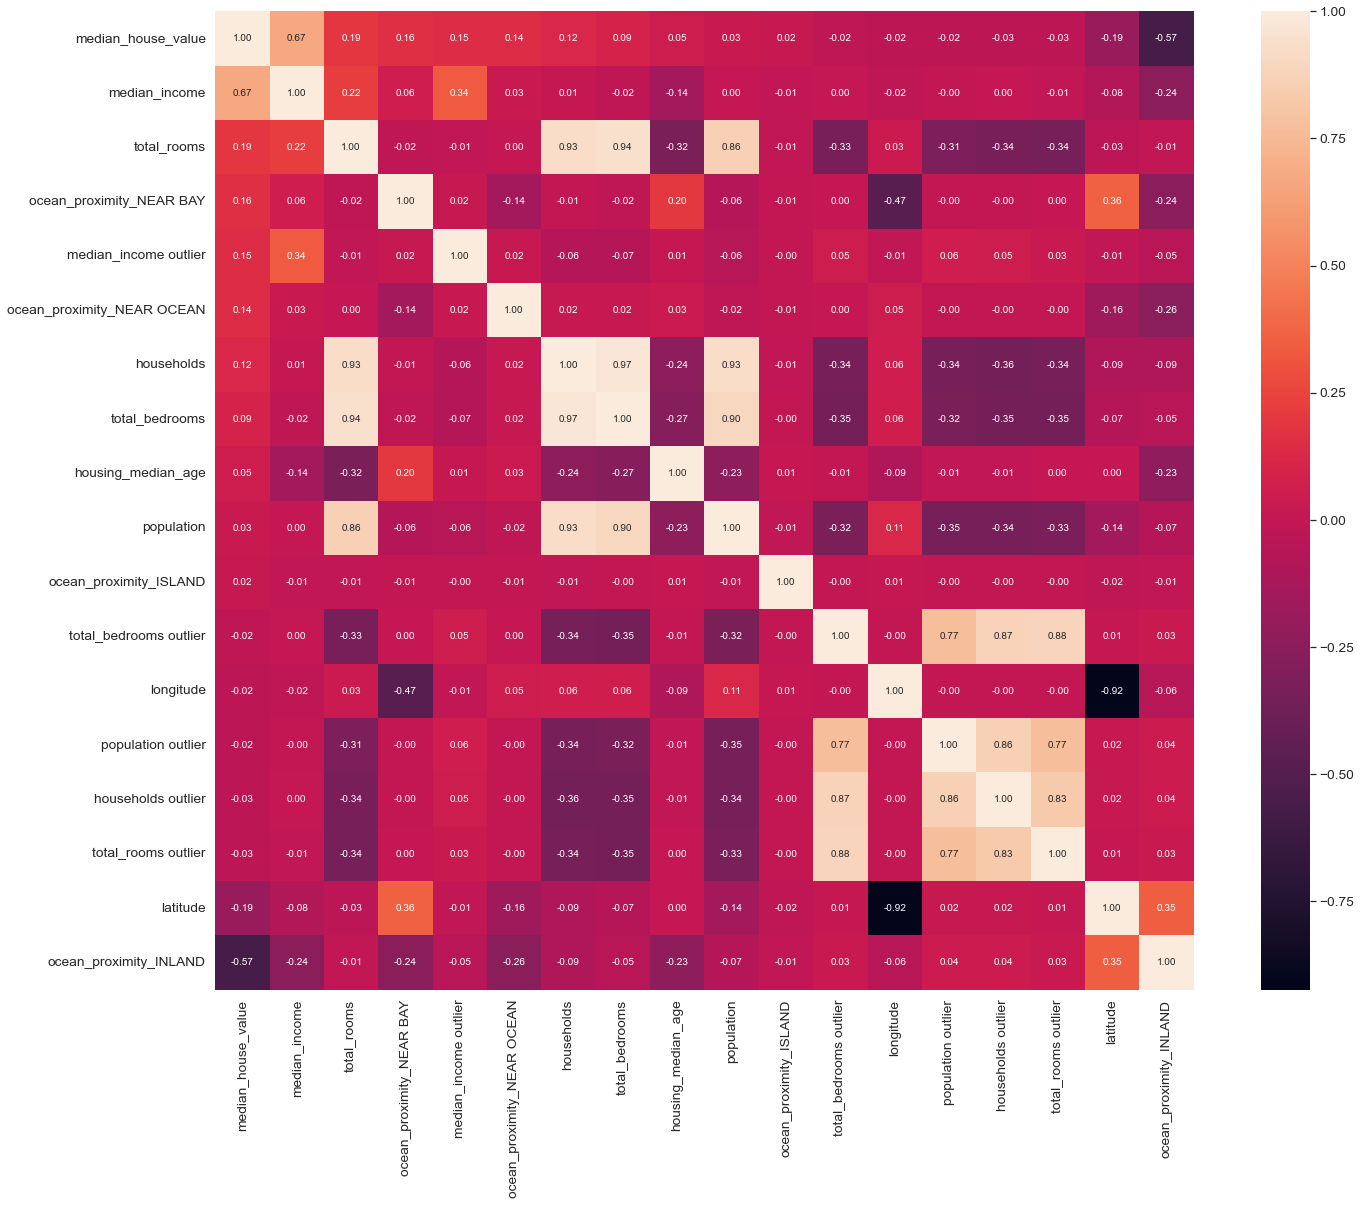

In [105]:
#### 'median_house_value' correlation matrix(zoomed heatmap style)
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'median_house_value')['median_house_value'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(24, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## Removing any features with correlations greater than threshold  

In [106]:
def remove_collinear_features(df, threshold):

    y = df['median_house_value']
    df.drop(columns = ['median_house_value'],inplace=True)
    
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df= df.drop(columns = drops)
    
    # Add the score back in to the data
    df['median_house_value'] = y
               
    return df

In [107]:
# Remove the collinear features above a specified correlation coefficient
df_c = remove_collinear_features(df, 0.6)

population | total_rooms | 0.86
households | total_rooms | 0.93
households | total_bedrooms | 0.97
total_bedrooms outlier | population outlier | 0.77
households outlier | population outlier | 0.86
households outlier | total_rooms outlier | 0.83


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   population outlier          20640 non-null  int64  
 9   total_rooms outlier         20640 non-null  int64  
 10  total_bedrooms outlier      20640 non-null  int64  
 11  households outlier          20640 non-null  int64  
 12  median_income outlier       20640 non-null  int64  
 13  ocean_proximity_INLAND      206

In [109]:
df_c.shape,df.shape

((20640, 14), (20640, 17))

In [110]:
df_c.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'median_income', 'population outlier',
       'total_rooms outlier', 'median_income outlier',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [111]:
df=df_c

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income,population outlier,total_rooms outlier,median_income outlier,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,3.71,6.78,4.86,8.33,0,0,0,0,0,1,0,13.02
1,-122.22,37.86,3.04,8.87,7.01,8.30,0,0,0,0,0,1,0,12.79
2,-122.24,37.85,3.95,7.29,5.25,7.26,0,0,0,0,0,1,0,12.77
3,-122.25,37.85,3.95,7.15,5.46,5.64,0,0,0,0,0,1,0,12.74
4,-122.25,37.85,3.95,7.39,5.63,3.85,0,0,0,0,0,1,0,12.74


In [113]:
df_original5=df.copy()

In [114]:
df_original5.to_csv('df_not scaled_housing.csv')

## 4)Scaling

## Before which ML models and methods you have to scale your data and why?

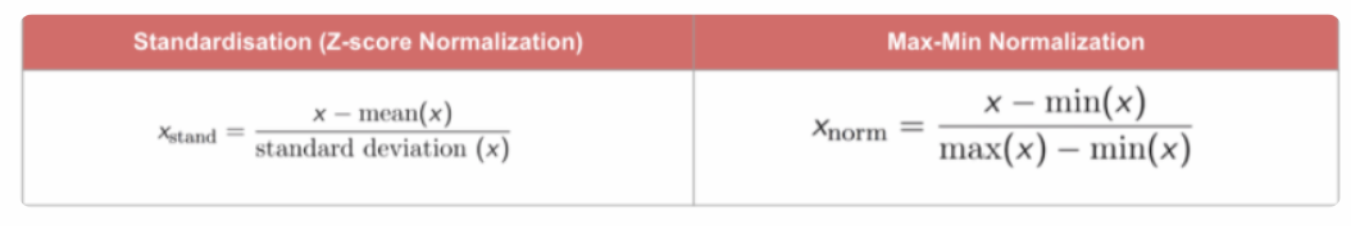

### When you are faced with features which are very different in scale / units, it is quite clear to see that classifiers / regressors which rely on euclidean distance such as k-nearest neighbours will fail or be sub-optimal. Same goes for other regressors. Especially the ones that rely on gradient descent based optimisation such as logistic regressions, Support Vector Machines and Neural networks. The only classifiers/regressors which are immune to impact of scale are the tree based regressors.

## Min Max Scaling:

Now a bit more detail the options we have for scaling of data. The first intuitive option is to use what is called the Min-Max scaler. In this we subtract the Minimum from all values – thereby marking a scale from Min to Max. Then divide it by the difference between Min and Max. 
#### The result is that our values will go from zero to 1. 
This is quite acceptable in cases where we are not concerned about the standardisation along the variance axes. e.g. image processing or neural networks expecting values between 0 to 1. 
### This method is very sensitive to outliers, So if you have outliers use Standard Scaler method

The downside however is that because we have now bounded the range from 0 to 1, we will have lower standard deviations and it suppresses the effect of outliers.

## Standard Scaler:

The way to overcome this is through Standard Scaler – or z-score normalisation. Firstly by subtracting the mean it brings the values around 0 – so has zero mean. Secondly, it divides the values by standard deviation thereby ensuring that 
### the resulting distribution is standard with a mean of 0 and standard deviation of 1. 
This results in the effects as shown below (taken from Rashka’s post – link below). As you can see, the original Green distribution when scaled using Min Max (blue) and Standard Scaler (red).

Intuitively, you could imagine the blue as pinching the distribution with your fingers to fit between 0 and 1. The red on the other hand is firstly centering around 0 and then projecting (like a ray projection) the variance until you find the plane where the standard deviation is 1. But note that the variance is not shrunk – the average variance (ok – square root of variance/ standard deviation) has been standardised to 1.

I have provided more links below if you want to explore more.

So where would you use Standard Scaler against Min Max :

The answer is as always ‘it depends’ but here are some general guidelines:

For most cases StandardScaler would do no harm. Especially when dealing with variance (PCA, clustering, logistic regression, SVMs, perceptrons, neural networks) in fact Standard Scaler would be very important. On the other hand it will not make much of a difference if you are using tree based classifiers or regressors. My bias is to default to Standard Scaling and check if I need to change it.

In [115]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [116]:
type(X)

pandas.core.frame.DataFrame

In [117]:
type(y)

pandas.core.series.Series

In [118]:
#scaled our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [119]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.00,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20640.00,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.00,3.23,0.57,0.00,2.89,3.37,3.61,3.95
total_rooms,20640.00,7.64,0.72,4.95,7.28,7.66,8.05,10.38
total_bedrooms,20640.00,6.06,0.70,3.34,5.69,6.08,6.47,8.77
median_income,20640.00,3.86,1.83,0.50,2.56,3.53,4.74,11.28
population outlier,20640.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
total_rooms outlier,20640.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
median_income outlier,20640.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
ocean_proximity_INLAND,20640.00,0.32,0.47,0.00,0.00,0.00,1.00,1.00


In [120]:
X=X_scaled 

In [122]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'median_income', 'population outlier',
       'total_rooms outlier', 'median_income outlier',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [123]:
#separating target and predictors
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']
X.shape

(20640, 13)

In [124]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=5)
res=lof.fit_predict(X)
X_not_outlier=X[res !=-1]
y_not_outlier=y[res !=-1]

In [125]:
df_clean=pd.concat([X_not_outlier,y_not_outlier],axis=1)
df_clean.shape

(20214, 14)

In [126]:
X.shape[0]-df_clean.shape[0]

426

In [127]:
df2_original=df.copy()

In [128]:
df=df_clean

In [129]:
type(df)

pandas.core.frame.DataFrame

In [131]:
X_original=X.copy()
 

## Spliting to test and Train:

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [133]:
"""Backward_Feature_Elimination"""
#Linear regression model using OLS
import statsmodels.api as sm
X1 = sm.add_constant(X)
ols = sm.OLS(y,X1)
lr = ols.fit()

print(lr.summary())

p=lr.pvalues
pvalue=max(lr.pvalues[1:len(lr.pvalues)])

while (pvalue>=.05):
    loc=0
    for i in lr.pvalues:
        if (i==pvalue):
          feature=lr.pvalues.index[loc] 
          print(feature)
          break
        loc+=1
    X=X.drop(feature,axis=1)
    X1 = sm.add_constant(X)
    ols = sm.OLS(y,X1)
    lr = ols.fit()
    pvalue=max(lr.pvalues[1:len(lr.pvalues)])
    
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3128.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:36:44   Log-Likelihood:                -6413.9
No. Observations:               20640   AIC:                         1.286e+04
Df Residuals:                   20626   BIC:                         1.297e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [134]:
#separating test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
#creating LinearRegression Object
model = LinearRegression()
#Training the Data Model
model.fit(X_train,y_train)

LinearRegression()

The Intercept: -1.2210633598336411
coeff=                         Coefficient
longitude                     -0.14
latitude                      -0.14
housing_median_age             0.06
total_rooms                   -0.33
total_bedrooms                 0.40
median_income                  0.22
population outlier             0.21
median_income outlier         -0.58
ocean_proximity_INLAND        -0.26
ocean_proximity_ISLAND         0.68


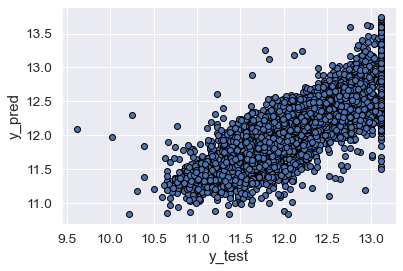

In [137]:
"""Model Evaluation"""
#Displaying the Intercept
print("The Intercept:",model.intercept_)
#Coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('coeff=',coeff_df)

y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred, edgecolor='black')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [139]:
"""Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error 
MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them"""

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.25287842522619663
MSE: 0.11082857350210876
RMSE: 0.3329092571589273


In [140]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test,y_pred))#R2 of test dataset
print(r2_score(y_train,model.predict(X_train))) ##R2 of train dataset

0.6588083667671747
0.664807402127769


In [141]:
print('Adjusted_R2= ',1 - (((len(X_test.index) - 1) / (len(X_test.index) - len(X_test.columns) - 1)) * (1 - r2_score(y_test,y_pred))))


Adjusted_R2=  0.6581457300741609


In [142]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clr=LinearRegression()
cross_val_score(clr,X,y,cv=5)
cross_val_score(clr,X,y,cv=5).mean()

0.5925626018075582

In [143]:
X_test.shape

(5160, 10)

In [144]:
y_test.shape

(5160,)

In [145]:
X_test.iloc[0]

longitude                -117.05
latitude                   32.58
housing_median_age          3.09
total_rooms                 7.65
total_bedrooms              5.99
median_income               4.15
population outlier          0.00
median_income outlier       0.00
ocean_proximity_INLAND      0.00
ocean_proximity_ISLAND      0.00
Name: 14740, dtype: float64

In [146]:
#dimensions of data
n = len(X_test) #number of observations in test data set
k = len(X_test.iloc[0]) #number of features
R2 = r2_score(y_test,y_pred)
R2

0.6588083667671747

In [147]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
Adj_R2 = 1 - ((1- R2)*(n-1)/(n-k-1))
print(Adj_R2)

0.6581457300741609


In [148]:
print(r2_score(y_train,model.predict(X_train)))

0.664807402127769


## K-Fold Cross Validation

In [149]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.5925626018075582

In [150]:
print(cross_val_score(LinearRegression(), X, y, cv=5, scoring="explained_variance").mean())

0.616084340976461


In [151]:
from sklearn.model_selection import KFold
from numpy import mean #instead of that you can use np.mean
from numpy import absolute
from numpy import sqrt

In [152]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores)) #MAE   np.mean(absolute(scores))

0.25266135979033366

In [153]:
scores #These are negative of MAE in 5 iterations

array([-0.25622794, -0.24832213, -0.25345718, -0.25240339, -0.25289616])

In [154]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
#view RMSE
sqrt(mean(absolute(scores))) #RMSE

0.3304248659982435

In [155]:
scores #there are MSE in 5 iterations

array([-0.11282151, -0.10528094, -0.11035475, -0.10736305, -0.11008271])

In [156]:
mean(absolute(scores)) #MSE

0.10918059206995719

In [157]:
sqrt(mean(absolute(scores))) # RMSE

0.3304248659982435

In [158]:
# Fit the regression Model
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)

[-0.14403425 -0.13505071  0.06176645 -0.32625006  0.40064661  0.22020933
  0.20862991 -0.58023065 -0.26464454  0.68249853]


In [159]:
# create the predictions 
y_test_predict=lr.predict(X_test)
print(y_test_predict.shape)

(5160,)


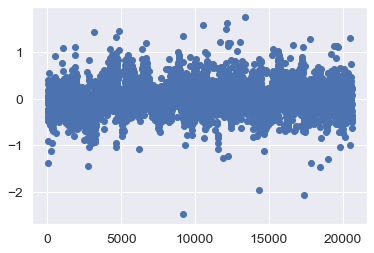

In [160]:
# plot the error (Error plot)
g=plt.plot(y_test-y_test_predict,marker='o',linestyle='') 
# Even though there are outliers and some deviations, 
 #most of the values close to zero 

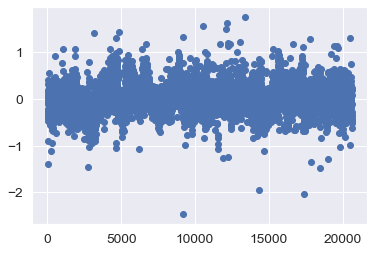

In [161]:
# Fit the regression model without b(Wo)
lr=LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)
y_test_predict=lr.predict(X_test)
g=plt.plot(y_test-y_test_predict,marker='o',linestyle='')

In [162]:
X=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'median_income', 'population outlier',
       'total_rooms outlier', 'median_income outlier',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y=df['median_house_value']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [165]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,median_income,population outlier,total_rooms outlier,median_income outlier,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9783,-121.20,36.14,2.48,8.23,6.57,3.96,0,0,0,0,0,0,0
14008,-117.19,32.75,3.95,7.31,5.44,8.15,0,0,0,0,0,0,1
15564,-117.05,33.11,2.89,8.39,6.46,5.48,0,0,0,0,0,0,0
7082,-118.01,33.94,3.56,7.19,5.46,4.27,0,0,0,0,0,0,0
20398,-118.86,34.22,3.26,7.48,5.69,5.58,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13390,-117.58,34.09,3.30,6.63,5.30,1.95,0,0,0,1,0,0,0
20041,-118.99,36.06,2.94,7.67,6.13,1.76,0,0,0,1,0,0,0
10061,-120.89,39.30,2.83,7.73,6.07,3.54,0,0,0,1,0,0,0
11041,-117.81,33.82,3.09,7.97,5.81,10.81,0,0,0,0,0,0,0


In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lm=LinearRegression()

In [168]:
lm.fit(X_train,y_train)

LinearRegression()

In [169]:
predictions=lm.predict(X_test)

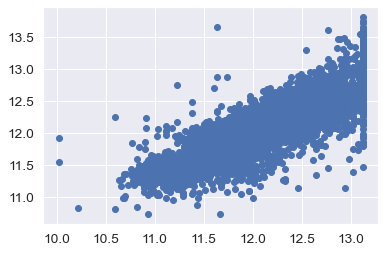

In [170]:
plt.scatter(y_test,predictions)

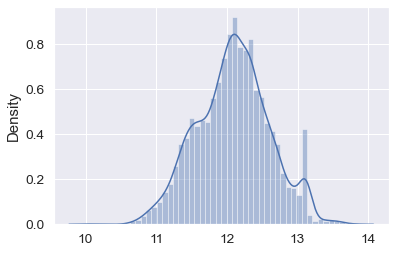

In [171]:
sns.distplot((y_test,predictions),bins=50);
# The graph is normalized and the model is well predicted!!

##  The graph is normalized and the model is well predicted!!